In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import os
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


In [8]:
df= pd.read_csv('data.csv')

In [9]:
df

,timestamp,nbr_of_tweets
0,02:14:24,3
1,02:14:25,3
2,02:14:26,4
3,02:14:27,6
4,02:14:28,3
...,...,...
43165,14:18:08,30
43166,14:18:09,33
43167,14:18:10,30
43168,14:18:11,27


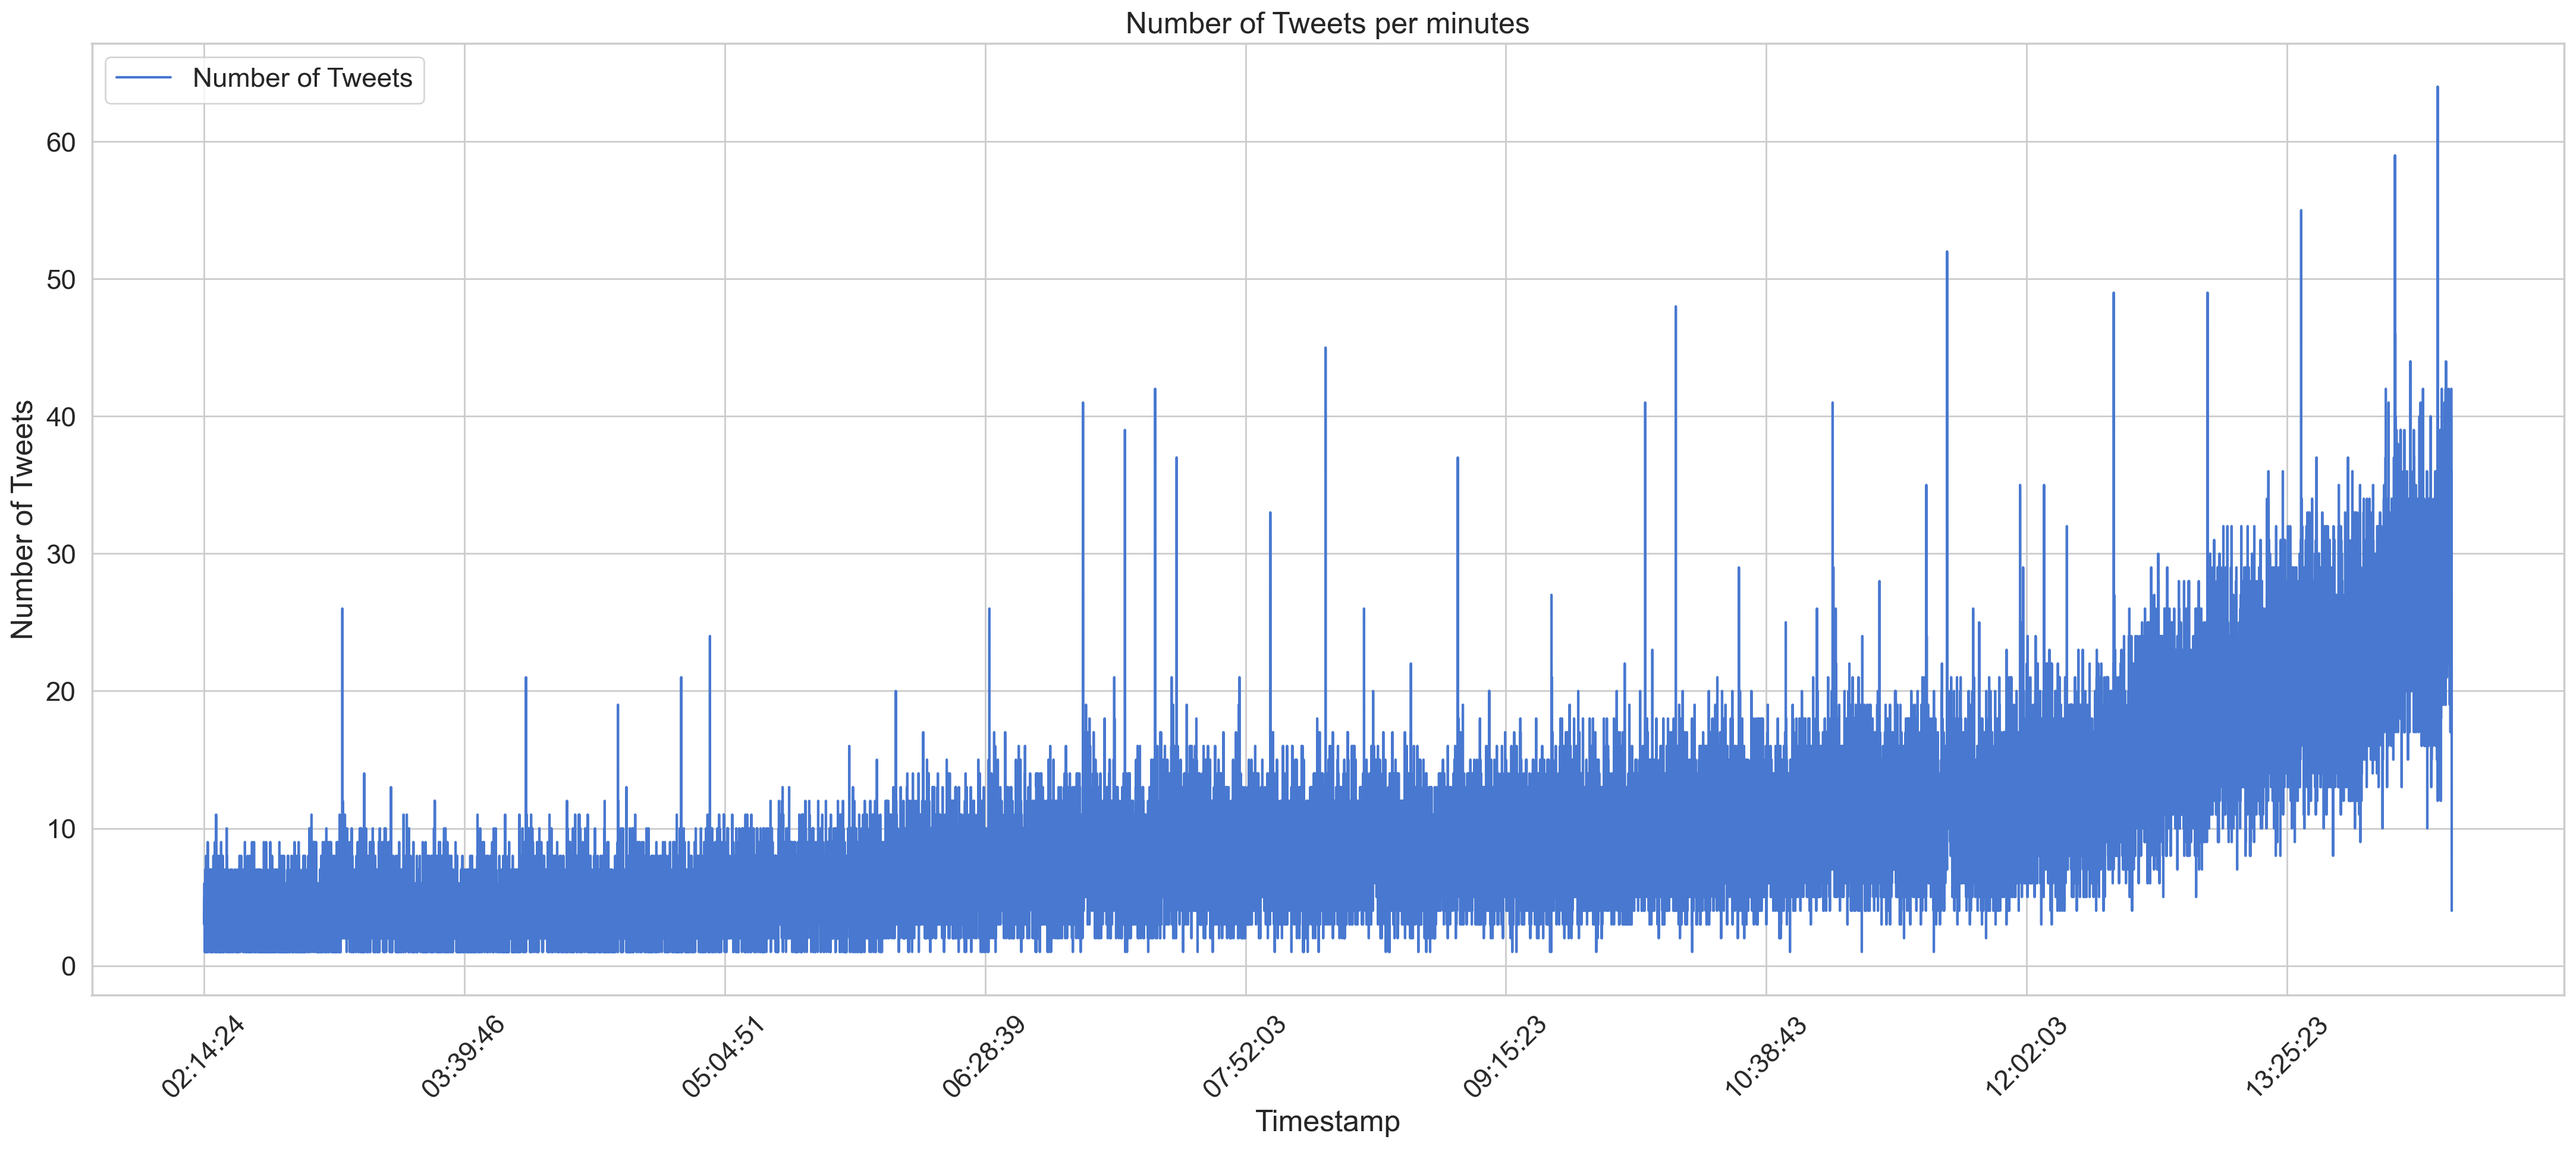

In [10]:
plt.plot(df['timestamp'], df['nbr_of_tweets'], label='Number of Tweets')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per minutes')
plt.legend()
plt.xticks(rotation=45)
x_ticks_frequency = 5000  # Show a tick every 60 data points 
total_data_points = len(df)
tick_positions = range(0, total_data_points, x_ticks_frequency)
tick_labels = df['timestamp'][tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)  
plt.tight_layout()  
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_squared_error
from sklearn.cluster import DBSCAN
from prophet import Prophet
import matplotlib.pyplot as plt

# Z-Score Method:

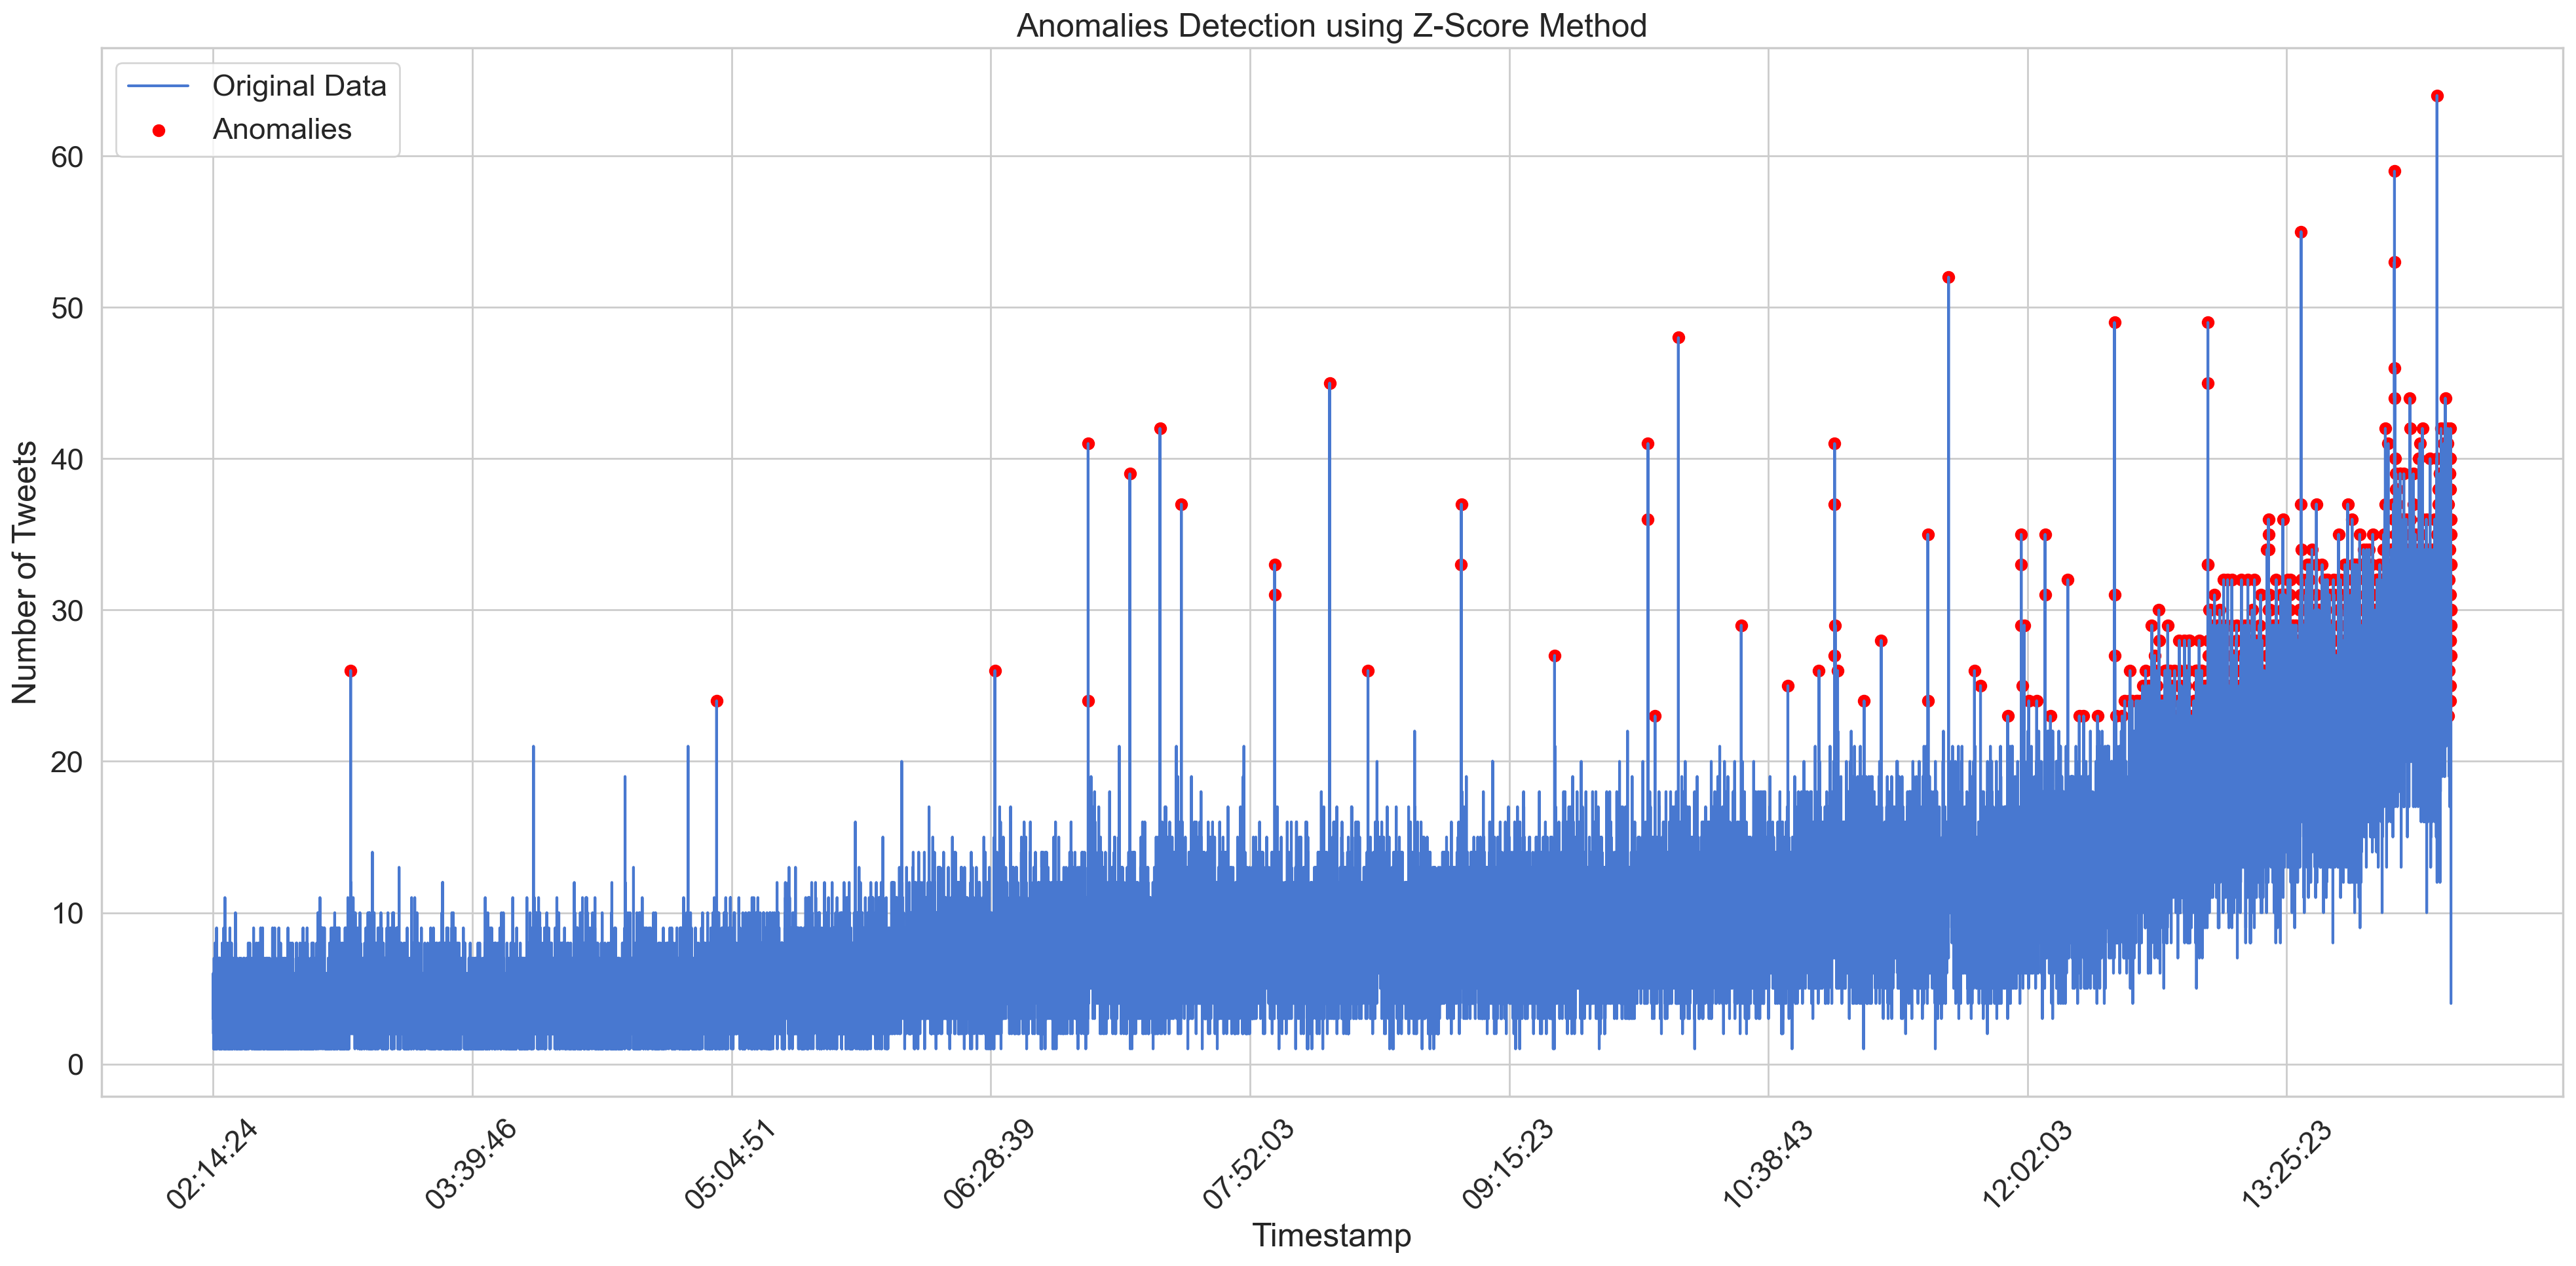

In [12]:
z_threshold = 2.0
z_scores = np.abs((df['nbr_of_tweets'] - df['nbr_of_tweets'].mean()) / df['nbr_of_tweets'].std())
anomalies_z = df[z_scores > z_threshold]

plt.figure(figsize=(20, 10))
plt.plot(df['timestamp'], df['nbr_of_tweets'], label='Original Data')
plt.scatter(anomalies_z['timestamp'], anomalies_z['nbr_of_tweets'], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('Anomalies Detection using Z-Score Method')
plt.legend()
plt.xticks(rotation=45)
x_ticks_frequency = 5000  # Show a tick every 60 data points 
total_data_points = len(df)
tick_positions = range(0, total_data_points, x_ticks_frequency)
tick_labels = df['timestamp'][tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)  
plt.tight_layout()  
plt.show()

In [22]:
# Calculate z-scores
z_scores = np.abs((df['nbr_of_tweets'] - df['nbr_of_tweets'].mean()) / df['nbr_of_tweets'].std())

# Create a new column 'z_score_anomalie' with 1 for anomalies and 0 for non-anomalies
df['z_score_anomalie'] = np.where(z_scores > z_threshold, 1, 0)

# Display the DataFrame with the new 'z_score_anomalie' column
df

,timestamp,nbr_of_tweets,dbscan_labels,z_score_anomalie
0,02:14:24,3,0,0
1,02:14:25,3,0,0
2,02:14:26,4,0,0
3,02:14:27,6,0,0
4,02:14:28,3,0,0
...,...,...,...,...
43165,14:18:08,30,0,1
43166,14:18:09,33,0,1
43167,14:18:10,30,0,1
43168,14:18:11,27,0,1


# Moving Average and Standard Deviation Method:

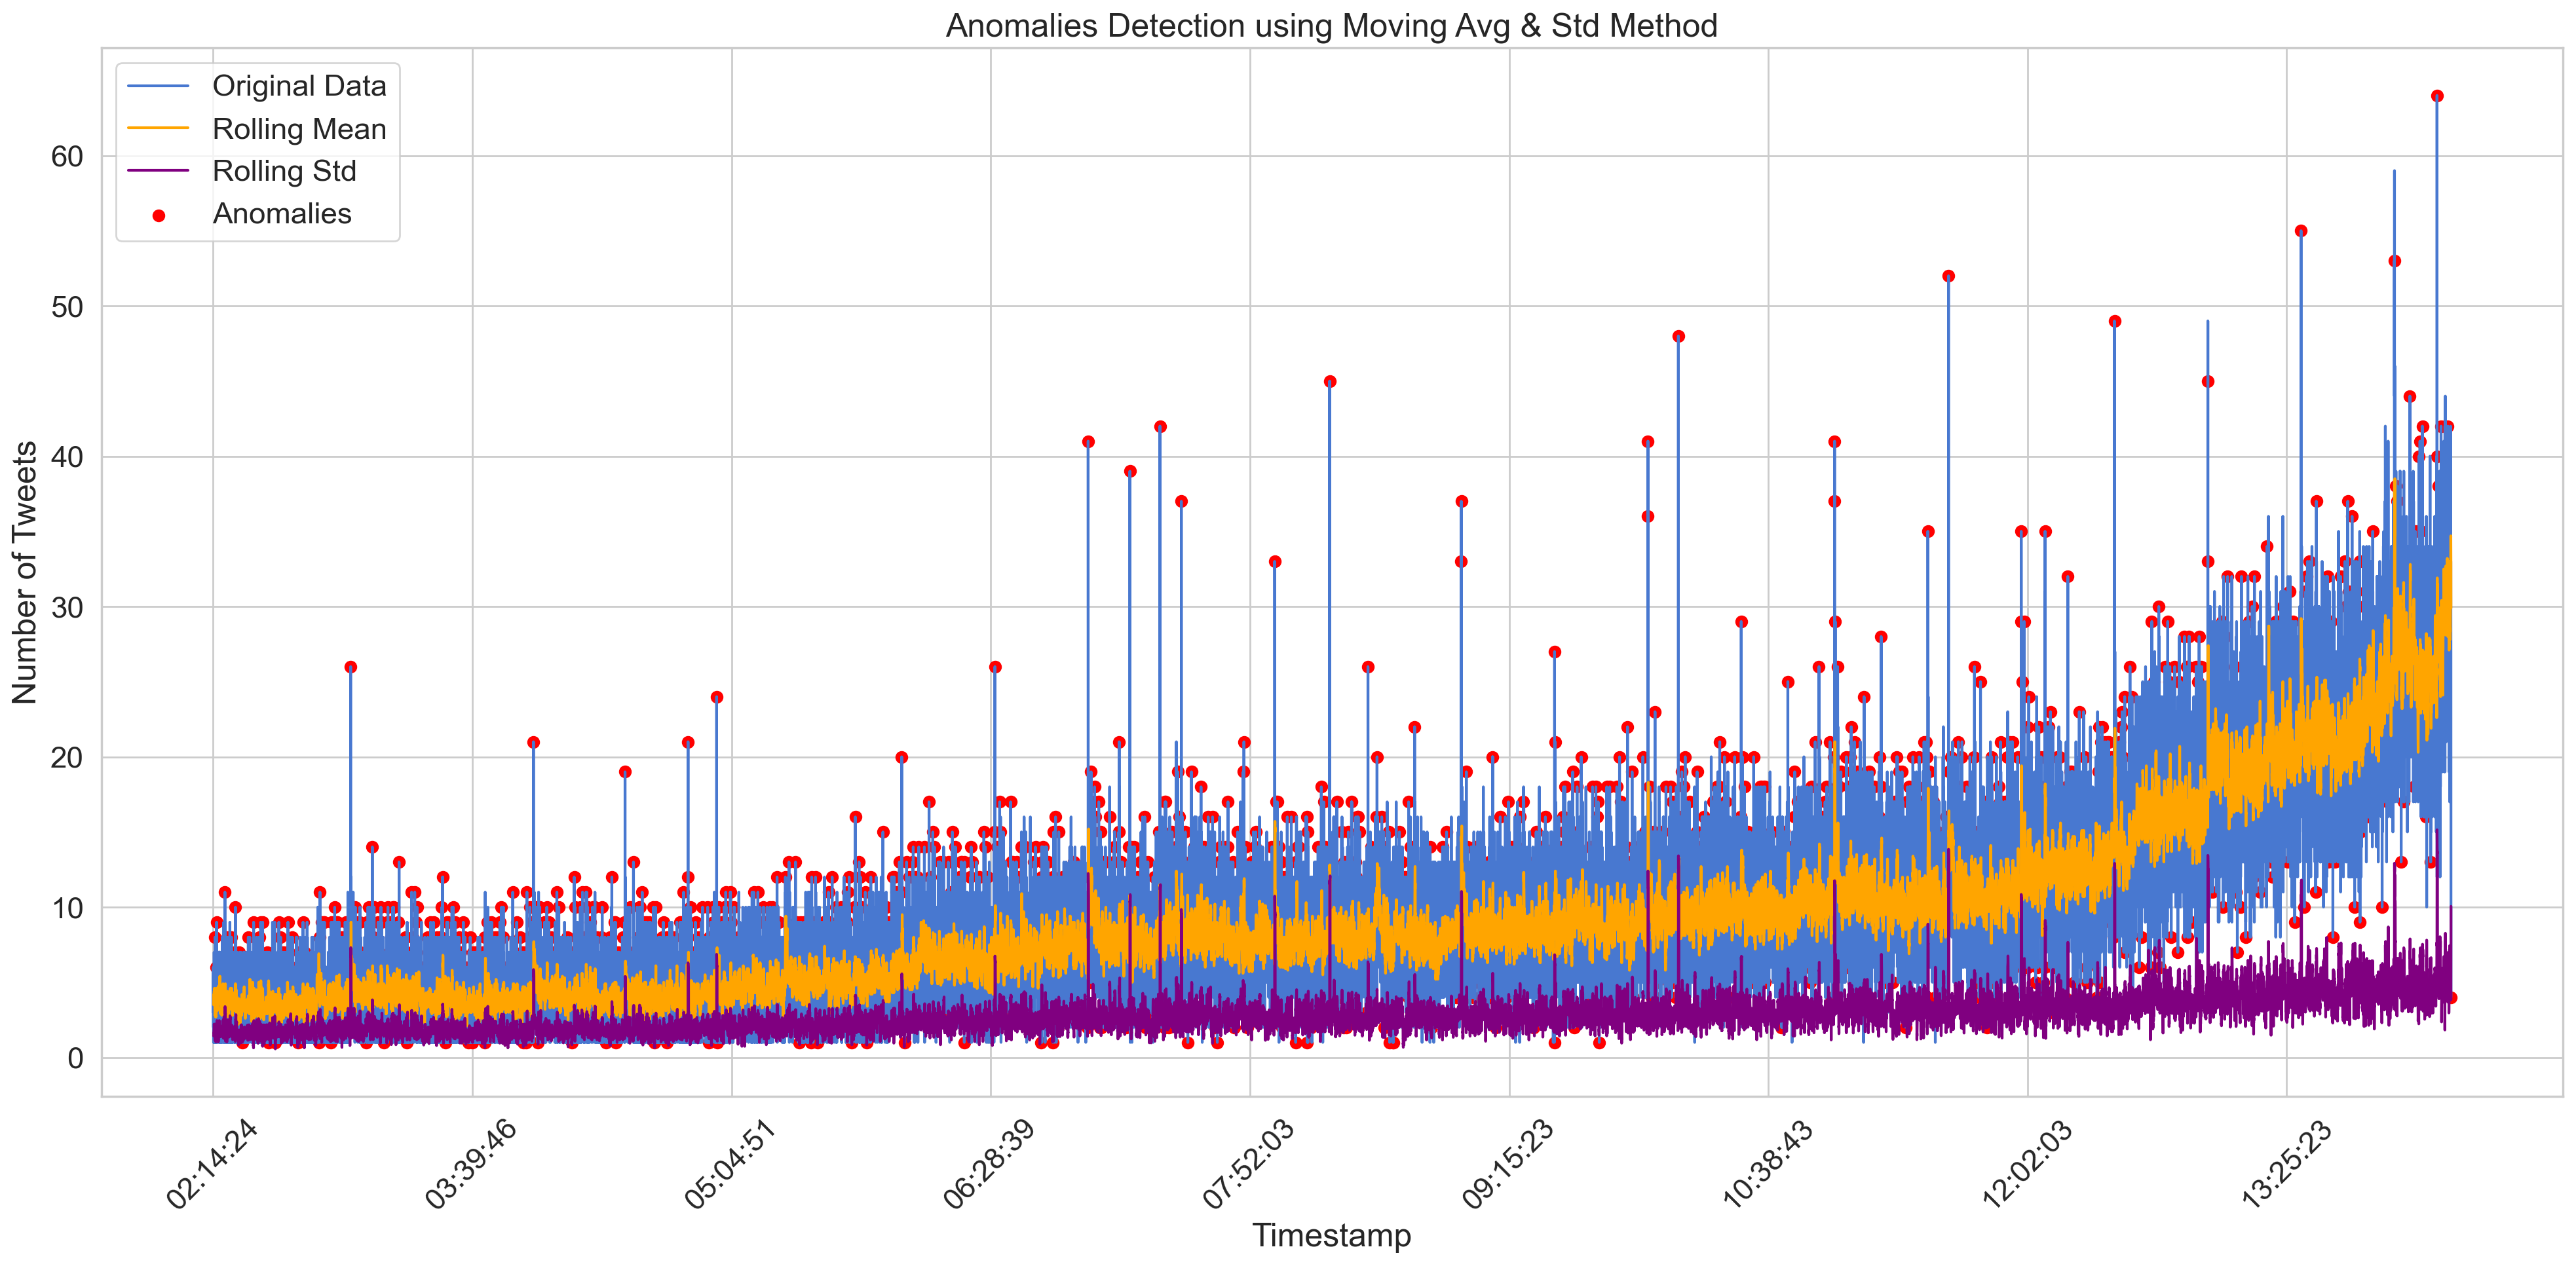

In [13]:
window_size = 10
rolling_mean = df['nbr_of_tweets'].rolling(window=window_size).mean()
rolling_std = df['nbr_of_tweets'].rolling(window=window_size).std()
anomalies_ma_sd = df[abs(df['nbr_of_tweets'] - rolling_mean) > 2 * rolling_std]

plt.figure(figsize=(20, 10))
plt.plot(df['timestamp'], df['nbr_of_tweets'], label='Original Data')
plt.plot(df['timestamp'], rolling_mean, color='orange', label='Rolling Mean')
plt.plot(df['timestamp'], rolling_std, color='purple', label='Rolling Std')
plt.scatter(anomalies_ma_sd['timestamp'], anomalies_ma_sd['nbr_of_tweets'], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('Anomalies Detection using Moving Avg & Std Method')
plt.legend()
plt.xticks(rotation=45)
x_ticks_frequency = 5000  # Show a tick every 60 data points 
total_data_points = len(df)
tick_positions = range(0, total_data_points, x_ticks_frequency)
tick_labels = df['timestamp'][tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)  
plt.tight_layout()  
plt.show()


In [23]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = df['nbr_of_tweets'].rolling(window=window_size).mean()
rolling_std = df['nbr_of_tweets'].rolling(window=window_size).std()

# Detect anomalies based on moving average and standard deviation method
anomalies_ma_sd = df[np.abs(df['nbr_of_tweets'] - rolling_mean) > 2 * rolling_std]

# Create a new column 'moving_average_anomalie' with 1 for anomalies and 0 for non-anomalies
df['moving_average_anomalie'] = 0  # Initialize with 0
df.loc[anomalies_ma_sd.index, 'moving_average_anomalie'] = 1  # Set anomalies to 1

# Display the DataFrame with the new 'moving_average_anomalie' column
df

,timestamp,nbr_of_tweets,dbscan_labels,z_score_anomalie,moving_average_anomalie
0,02:14:24,3,0,0,0
1,02:14:25,3,0,0,0
2,02:14:26,4,0,0,0
3,02:14:27,6,0,0,0
4,02:14:28,3,0,0,0
...,...,...,...,...,...
43165,14:18:08,30,0,1,0
43166,14:18:09,33,0,1,0
43167,14:18:10,30,0,1,0
43168,14:18:11,27,0,1,0


# Isolation Forest:

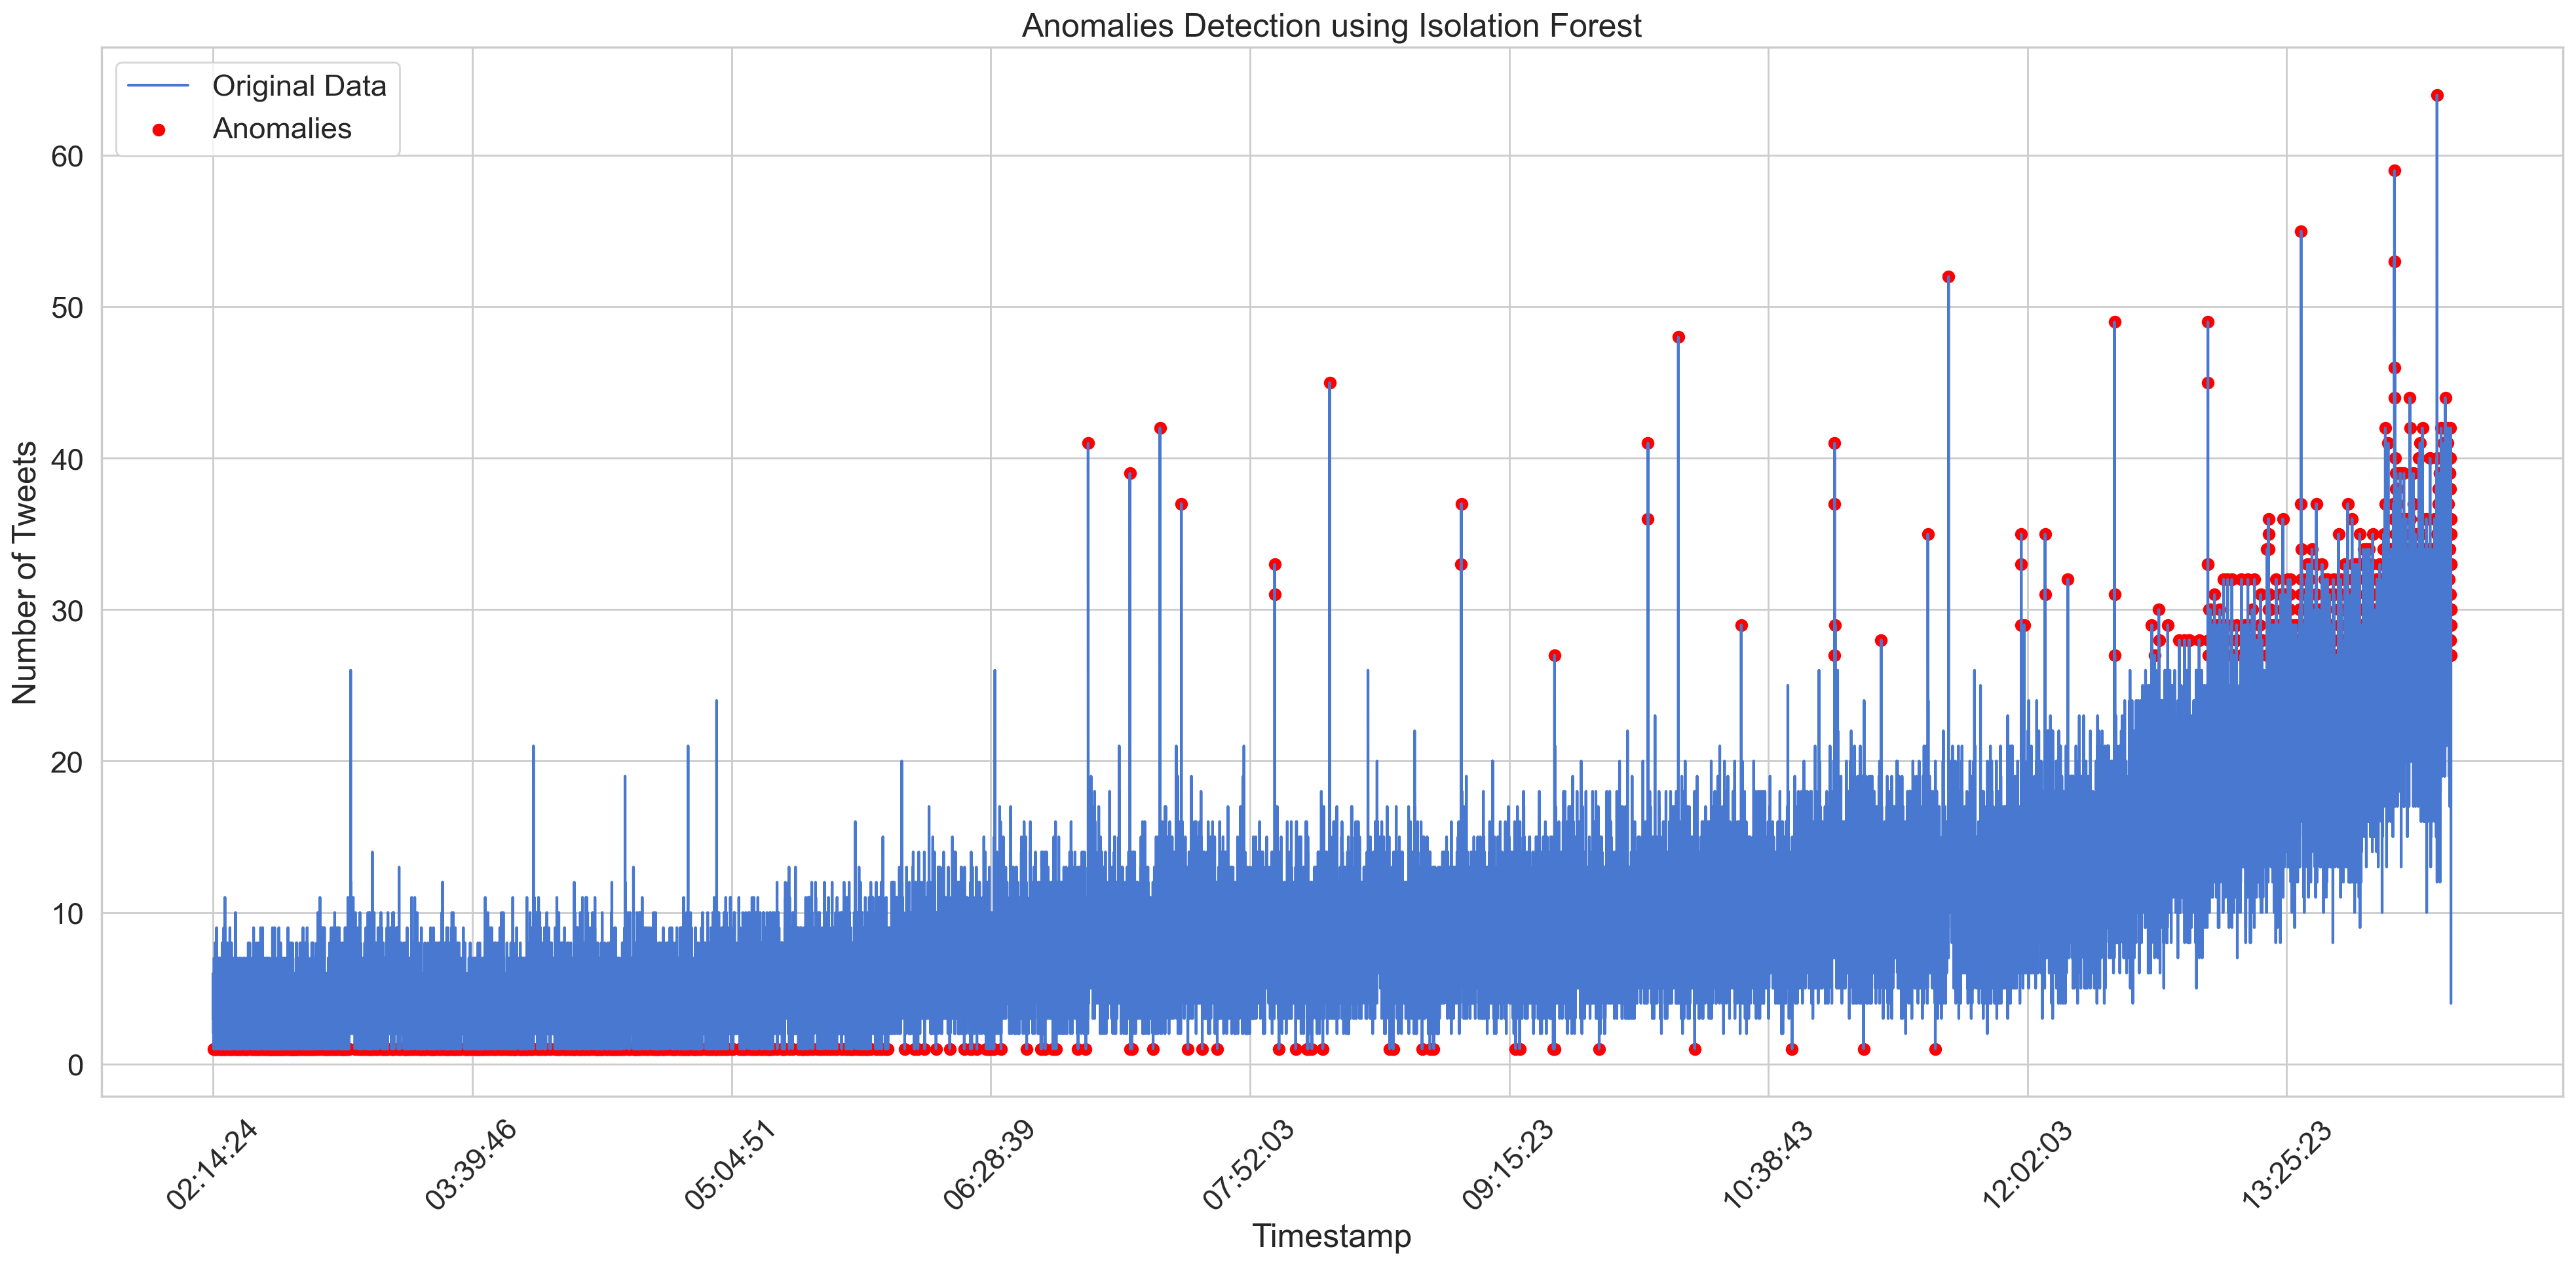

In [14]:
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(df[['nbr_of_tweets']])
anomalies_iso = df[iso_forest.predict(df[['nbr_of_tweets']]) == -1]

plt.figure(figsize=(20, 10))
plt.plot(df['timestamp'], df['nbr_of_tweets'], label='Original Data')
plt.scatter(anomalies_iso['timestamp'], anomalies_iso['nbr_of_tweets'], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('Anomalies Detection using Isolation Forest')
plt.legend()
plt.xticks(rotation=45)
x_ticks_frequency = 5000  # Show a tick every 60 data points 
total_data_points = len(df)
tick_positions = range(0, total_data_points, x_ticks_frequency)
tick_labels = df['timestamp'][tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)  
plt.tight_layout()  
plt.show()


In [30]:
# Create an Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the Isolation Forest model on the 'nbr_of_tweets' column
iso_forest.fit(df[['nbr_of_tweets']])

# Predict outliers/anomalies using Isolation Forest
df['isolation_forest_anomalie'] = iso_forest.predict(df[['nbr_of_tweets']])
df['isolation_forest_anomalie'] = df['isolation_forest_anomalie'].apply(lambda x: 1 if x == -1 else 0)

# Display the DataFrame with the new 'isolation_forest_anomalie' column
df

,timestamp,nbr_of_tweets,dbscan_labels,z_score_anomalie,moving_average_anomalie,isolation_forest_anomalie
0,02:14:24,3,0,0,0,0
1,02:14:25,3,0,0,0,0
2,02:14:26,4,0,0,0,0
3,02:14:27,6,0,0,0,0
4,02:14:28,3,0,0,0,0
...,...,...,...,...,...,...
43165,14:18:08,30,0,1,0,1
43166,14:18:09,33,0,1,0,1
43167,14:18:10,30,0,1,0,1
43168,14:18:11,27,0,1,0,1


# Local Outlier Factor:

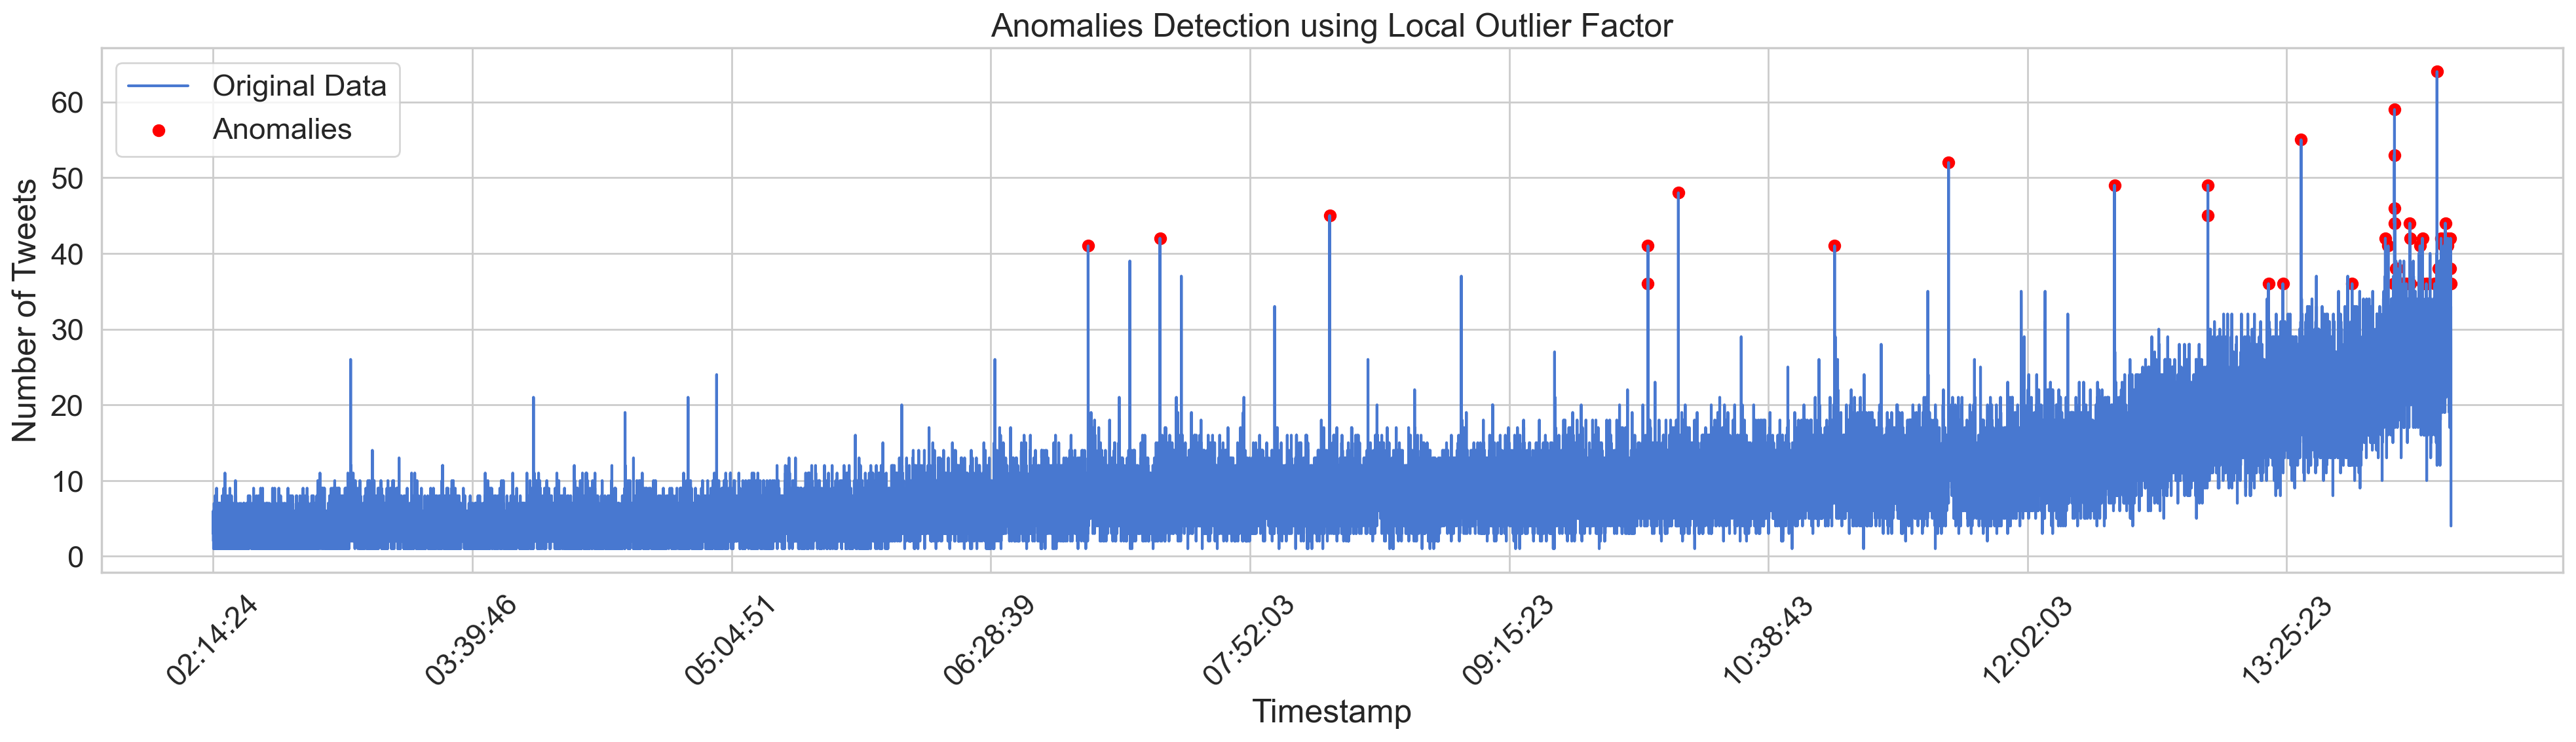

In [15]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_labels = lof.fit_predict(df[['nbr_of_tweets']])
anomalies_lof = df[lof_labels == -1]

plt.figure(figsize=(20, 6))
plt.plot(df['timestamp'], df['nbr_of_tweets'], label='Original Data')
plt.scatter(anomalies_lof['timestamp'], anomalies_lof['nbr_of_tweets'], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('Anomalies Detection using Local Outlier Factor')
plt.legend()
plt.xticks(rotation=45)
x_ticks_frequency = 5000  # Show a tick every 60 data points 
total_data_points = len(df)
tick_positions = range(0, total_data_points, x_ticks_frequency)
tick_labels = df['timestamp'][tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)  
plt.tight_layout()  
plt.show()



In [31]:

# Create a Local Outlier Factor (LOF) model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Fit the LOF model on the 'nbr_of_tweets' column and predict outliers
lof_labels = lof.fit_predict(df[['nbr_of_tweets']])

# Filter anomalies predicted by LOF
df['lof_anomalie'] = lof_labels
df['lof_anomalie'] = df['lof_anomalie'].apply(lambda x: 1 if x == -1 else 0)

# Display the DataFrame with the new 'lof_anomalie' column
df

,timestamp,nbr_of_tweets,dbscan_labels,z_score_anomalie,moving_average_anomalie,isolation_forest_anomalie,lof_anomalie
0,02:14:24,3,0,0,0,0,0
1,02:14:25,3,0,0,0,0,0
2,02:14:26,4,0,0,0,0,0
3,02:14:27,6,0,0,0,0,0
4,02:14:28,3,0,0,0,0,0
...,...,...,...,...,...,...,...
43165,14:18:08,30,0,1,0,1,0
43166,14:18:09,33,0,1,0,1,0
43167,14:18:10,30,0,1,0,1,0
43168,14:18:11,27,0,1,0,1,0


# One-Class SVM:

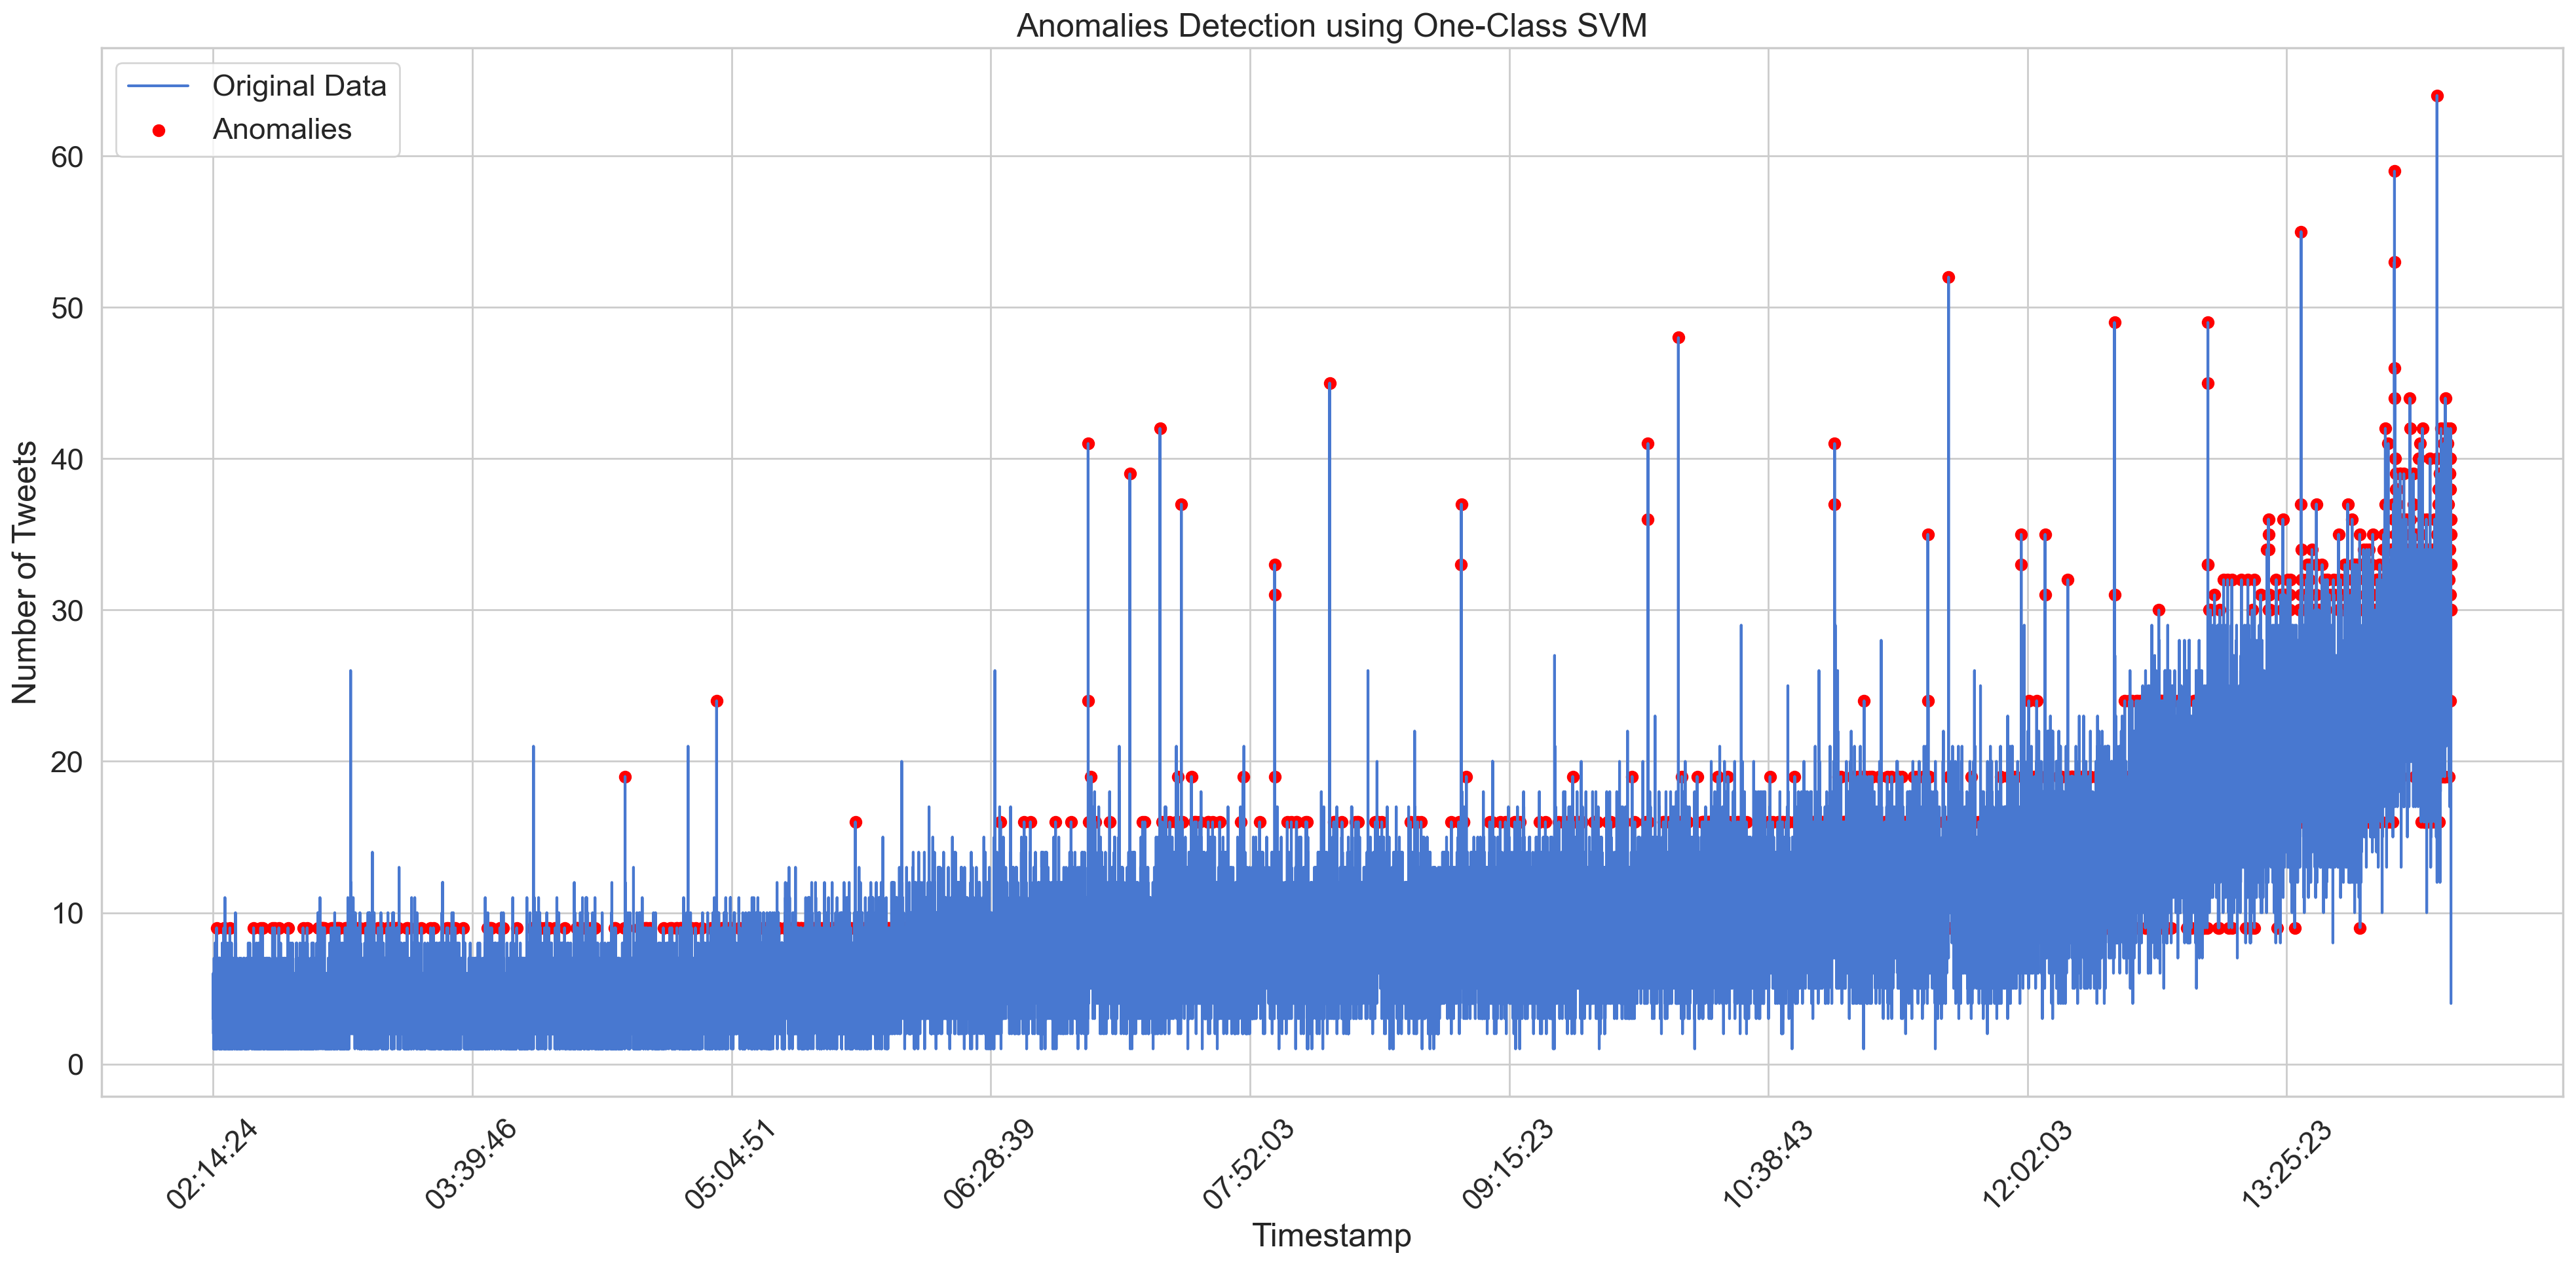

In [16]:
ocsvm = OneClassSVM(nu=0.05)
ocsvm.fit(df[['nbr_of_tweets']])
anomalies_ocsvm = df[ocsvm.predict(df[['nbr_of_tweets']]) == -1]

plt.figure(figsize=(20, 10))
plt.plot(df['timestamp'], df['nbr_of_tweets'], label='Original Data')
plt.scatter(anomalies_ocsvm['timestamp'], anomalies_ocsvm['nbr_of_tweets'], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('Anomalies Detection using One-Class SVM')
plt.legend()
plt.xticks(rotation=45)
x_ticks_frequency = 5000  # Show a tick every 60 data points 
total_data_points = len(df)
tick_positions = range(0, total_data_points, x_ticks_frequency)
tick_labels = df['timestamp'][tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)  
plt.tight_layout()  
plt.show()


In [32]:
# Create a One-Class SVM model
ocsvm = OneClassSVM(nu=0.05)

# Fit the One-Class SVM model on the 'nbr_of_tweets' column and predict outliers
ocsvm.fit(df[['nbr_of_tweets']])

# Filter anomalies predicted by One-Class SVM
df['ocsvm_anomalie'] = ocsvm.predict(df[['nbr_of_tweets']])
df['ocsvm_anomalie'] = df['ocsvm_anomalie'].apply(lambda x: 1 if x == -1 else 0)

# Display the DataFrame with the new 'ocsvm_anomalie' column
df

,timestamp,nbr_of_tweets,dbscan_labels,z_score_anomalie,moving_average_anomalie,isolation_forest_anomalie,lof_anomalie,ocsvm_anomalie
0,02:14:24,3,0,0,0,0,0,0
1,02:14:25,3,0,0,0,0,0,0
2,02:14:26,4,0,0,0,0,0,0
3,02:14:27,6,0,0,0,0,0,0
4,02:14:28,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
43165,14:18:08,30,0,1,0,1,0,1
43166,14:18:09,33,0,1,0,1,0,1
43167,14:18:10,30,0,1,0,1,0,1
43168,14:18:11,27,0,1,0,1,0,0


# DBSCAN:

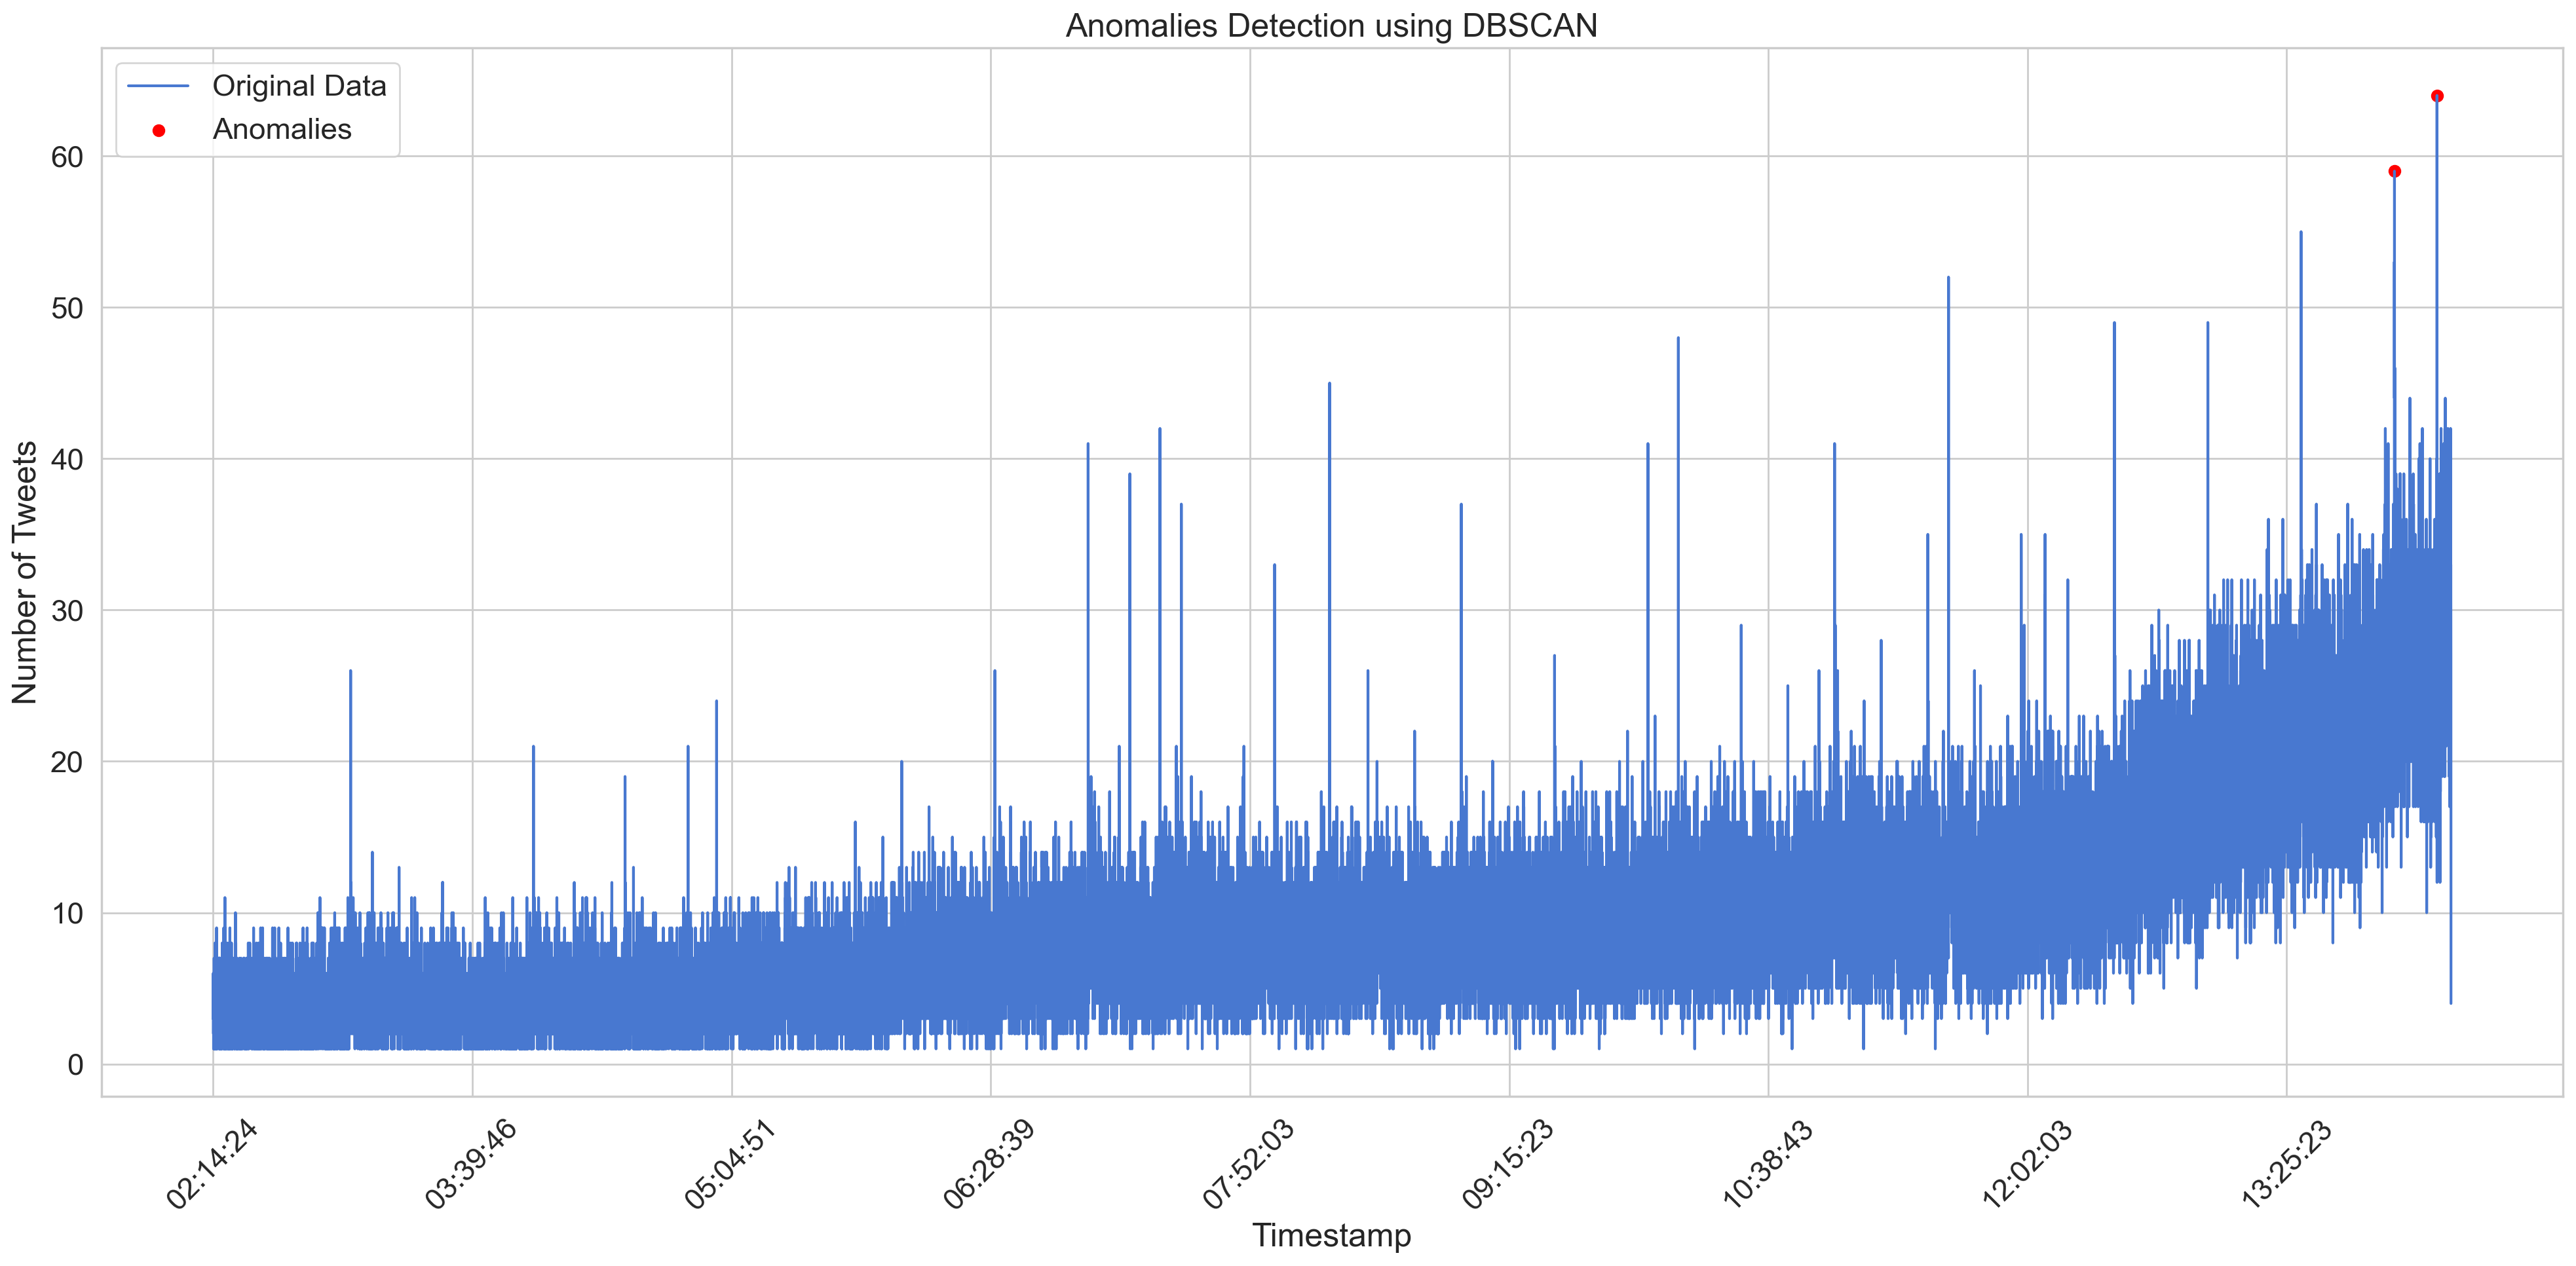

In [17]:
dbscan = DBSCAN(eps=3, min_samples=5)
df['dbscan_labels'] = dbscan.fit_predict(df[['nbr_of_tweets']])
anomalies_dbscan = df[df['dbscan_labels'] == -1]

plt.figure(figsize=(20, 10))
plt.plot(df['timestamp'], df['nbr_of_tweets'], label='Original Data')
plt.scatter(anomalies_dbscan['timestamp'], anomalies_dbscan['nbr_of_tweets'], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('Anomalies Detection using DBSCAN')
plt.legend()
plt.xticks(rotation=45)
x_ticks_frequency = 5000  # Show a tick every 60 data points 
total_data_points = len(df)
tick_positions = range(0, total_data_points, x_ticks_frequency)
tick_labels = df['timestamp'][tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)  
plt.tight_layout()  
plt.show()

In [33]:
# Create a DBSCAN model
dbscan = DBSCAN(eps=3, min_samples=5)

# Fit the DBSCAN model on the 'nbr_of_tweets' column and predict labels
df['dbscan_labels'] = dbscan.fit_predict(df[['nbr_of_tweets']])

# Filter anomalies predicted by DBSCAN (where label is -1)
df['dbscan_anomalie'] = df['dbscan_labels'].apply(lambda x: 1 if x == -1 else 0)

# Display the DataFrame with the new 'dbscan_anomalie' column
df

,timestamp,nbr_of_tweets,dbscan_labels,z_score_anomalie,moving_average_anomalie,isolation_forest_anomalie,lof_anomalie,ocsvm_anomalie,dbscan_anomalie
0,02:14:24,3,0,0,0,0,0,0,0
1,02:14:25,3,0,0,0,0,0,0,0
2,02:14:26,4,0,0,0,0,0,0,0
3,02:14:27,6,0,0,0,0,0,0,0
4,02:14:28,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
43165,14:18:08,30,0,1,0,1,0,1,0
43166,14:18:09,33,0,1,0,1,0,1,0
43167,14:18:10,30,0,1,0,1,0,1,0
43168,14:18:11,27,0,1,0,1,0,0,0


# Autoencoders:

In [18]:
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from keras.models import Model

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['nbr_of_tweets']])

# Build and train the autoencoder model
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)
decoded = Dense(1, activation=None)(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)

# Reconstruct the data using the trained autoencoder
reconstructed_data = autoencoder.predict(scaled_data)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(scaled_data - reconstructed_data), axis=1)
threshold_autoencoder = np.percentile(reconstruction_error, 95)
anomalies_autoencoder = df[reconstruction_error > threshold_autoencoder]


Epoch 1/50
1215/1215 [==============================] - 2s 1ms/step - loss: 0.1111 - val_loss: 7.2144e-05
Epoch 2/50
1215/1215 [==============================] - 1s 891us/step - loss: 0.0084 - val_loss: 2.9453e-07
Epoch 3/50
1215/1215 [==============================] - 1s 892us/step - loss: 0.0012 - val_loss: 4.4042e-08
Epoch 4/50
1215/1215 [==============================] - 1s 904us/step - loss: 2.3324e-04 - val_loss: 2.5334e-07
Epoch 5/50
1215/1215 [==============================] - 1s 878us/step - loss: 2.0814e-05 - val_loss: 3.4878e-08
Epoch 6/50
1215/1215 [==============================] - 1s 879us/step - loss: 3.2926e-07 - val_loss: 2.3241e-08
Epoch 7/50
1215/1215 [==============================] - 1s 891us/step - loss: 2.2623e-10 - val_loss: 2.3088e-08
Epoch 8/50
1215/1215 [==============================] - 1s 892us/step - loss: 2.5418e-07 - val_loss: 2.3140e-08
Epoch 9/50
1215/1215 [==============================] - 1s 892us/step - loss: 9.5967e-10 - val_loss: 2.3334e-08
Epoch 

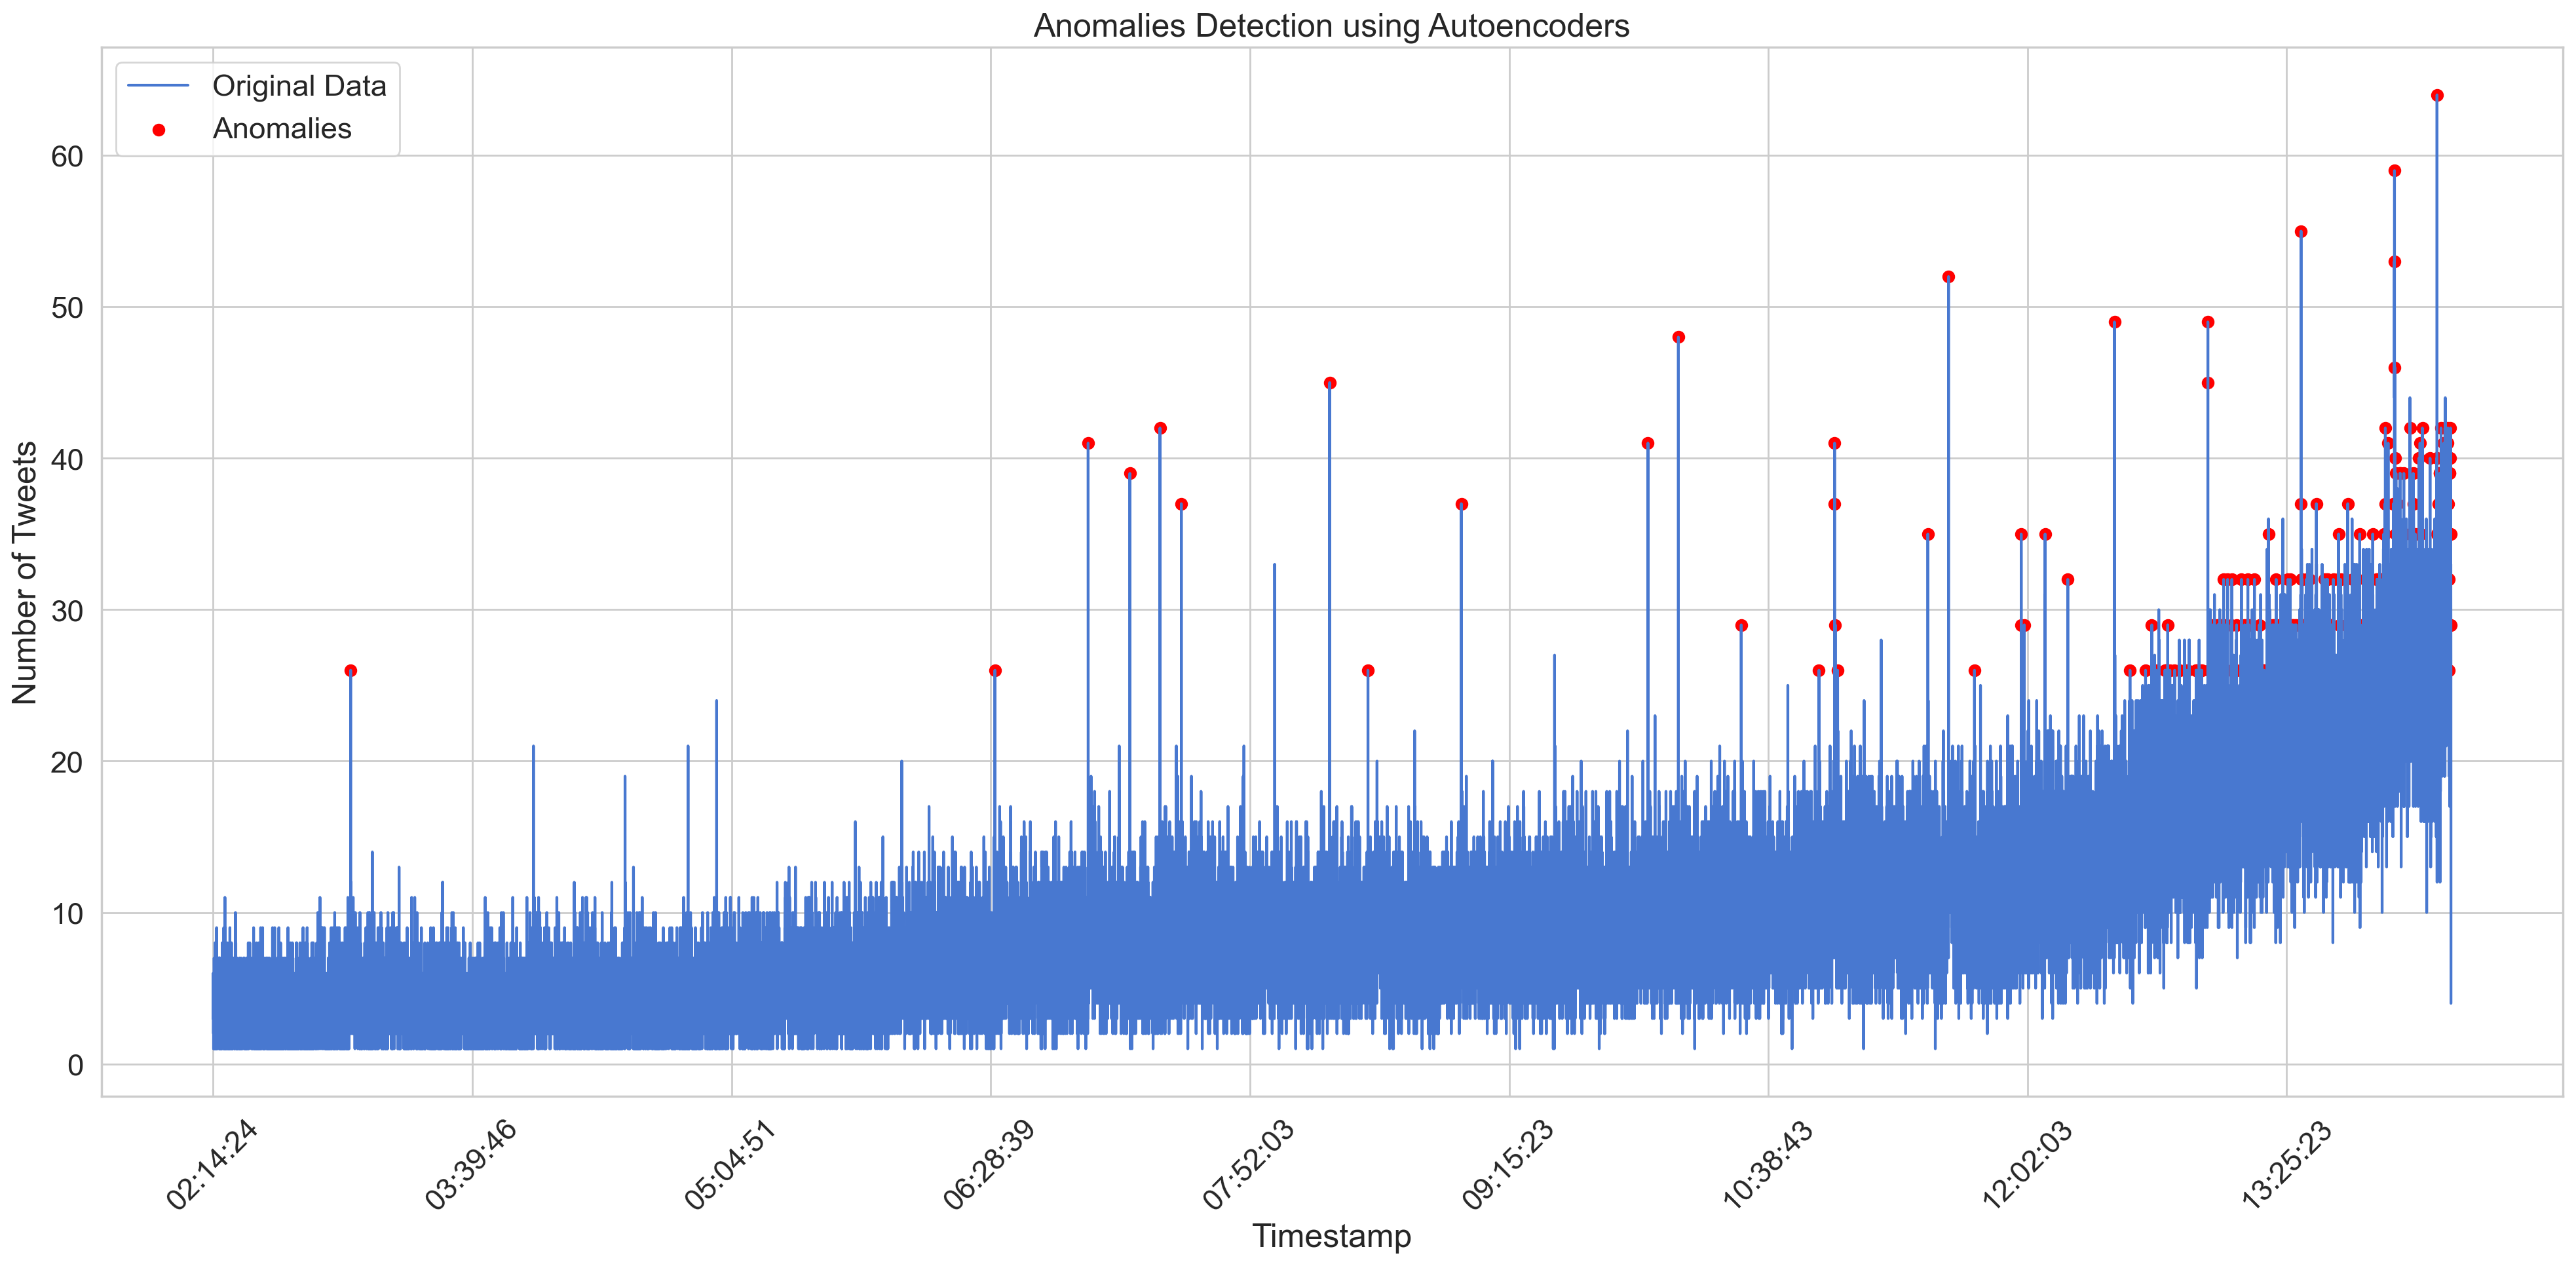

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(df['timestamp'], df['nbr_of_tweets'], label='Original Data')
plt.scatter(anomalies_autoencoder['timestamp'], anomalies_autoencoder['nbr_of_tweets'], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('Anomalies Detection using Autoencoders')
plt.legend()
plt.xticks(rotation=45)
x_ticks_frequency = 5000  # Show a tick every 60 data points 
total_data_points = len(df)
tick_positions = range(0, total_data_points, x_ticks_frequency)
tick_labels = df['timestamp'][tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)  
plt.tight_layout()  
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['nbr_of_tweets']])

# Build and train the autoencoder model
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)
decoded = Dense(1, activation=None)(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)

# Reconstruct the data using the trained autoencoder
reconstructed_data = autoencoder.predict(scaled_data)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(scaled_data - reconstructed_data), axis=1)
threshold_autoencoder = np.percentile(reconstruction_error, 95)

# Create a new column 'autoencoder_anomalie' in df indicating anomalies with 1 and non-anomalies with 0
df['autoencoder_anomalie'] = np.where(reconstruction_error > threshold_autoencoder, 1, 0)

# Display the DataFrame with the new 'autoencoder_anomalie' column
print(df)


Epoch 1/50
1215/1215 [==============================] - 2s 967us/step - loss: 0.0262 - val_loss: 0.0069
Epoch 2/50
1215/1215 [==============================] - 1s 913us/step - loss: 9.2289e-05 - val_loss: 2.7608e-05
Epoch 3/50
1215/1215 [==============================] - 1s 890us/step - loss: 8.2550e-07 - val_loss: 6.9334e-06
Epoch 4/50
1215/1215 [==============================] - 1s 883us/step - loss: 2.4273e-07 - val_loss: 5.5006e-06
Epoch 5/50
1215/1215 [==============================] - 1s 899us/step - loss: 1.0346e-07 - val_loss: 1.6011e-06
Epoch 6/50
1215/1215 [==============================] - 1s 904us/step - loss: 3.4258e-08 - val_loss: 7.4077e-07
Epoch 7/50
1215/1215 [==============================] - 1s 904us/step - loss: 8.9015e-09 - val_loss: 4.2326e-07
Epoch 8/50
1215/1215 [==============================] - 1s 919us/step - loss: 2.7460e-09 - val_loss: 2.5658e-07
Epoch 9/50
1215/1215 [==============================] - 1s 918us/step - loss: 4.8625e-15 - val_loss: 2.5659e-07


In [35]:
df

,timestamp,nbr_of_tweets,dbscan_labels,z_score_anomalie,moving_average_anomalie,isolation_forest_anomalie,lof_anomalie,ocsvm_anomalie,dbscan_anomalie,autoencoder_anomalie
0,02:14:24,3,0,0,0,0,0,0,0,0
1,02:14:25,3,0,0,0,0,0,0,0,0
2,02:14:26,4,0,0,0,0,0,0,0,0
3,02:14:27,6,0,0,0,0,0,0,0,0
4,02:14:28,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
43165,14:18:08,30,0,1,0,1,0,1,0,1
43166,14:18:09,33,0,1,0,1,0,1,0,0
43167,14:18:10,30,0,1,0,1,0,1,0,1
43168,14:18:11,27,0,1,0,1,0,0,0,0


# Prophet:

In [20]:
# Prepare data for Prophet
prophet_data = df.rename(columns={'timestamp': 'ds', 'nbr_of_tweets': 'y'})

# Create and fit the Prophet model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_data)

# Make future dataframe for predictions
future = prophet_model.make_future_dataframe(periods=0)
forecast = prophet_model.predict(future)

# Detect anomalies based on prediction residuals
prophet_data['residual'] = np.abs(prophet_data['y'] - forecast['yhat'])
threshold_prophet = np.percentile(prophet_data['residual'], 95)
anomalies_prophet = prophet_data[prophet_data['residual'] > threshold_prophet]

14:21:14 - cmdstanpy - INFO - Chain [1] start processing
14:21:21 - cmdstanpy - INFO - Chain [1] done processing


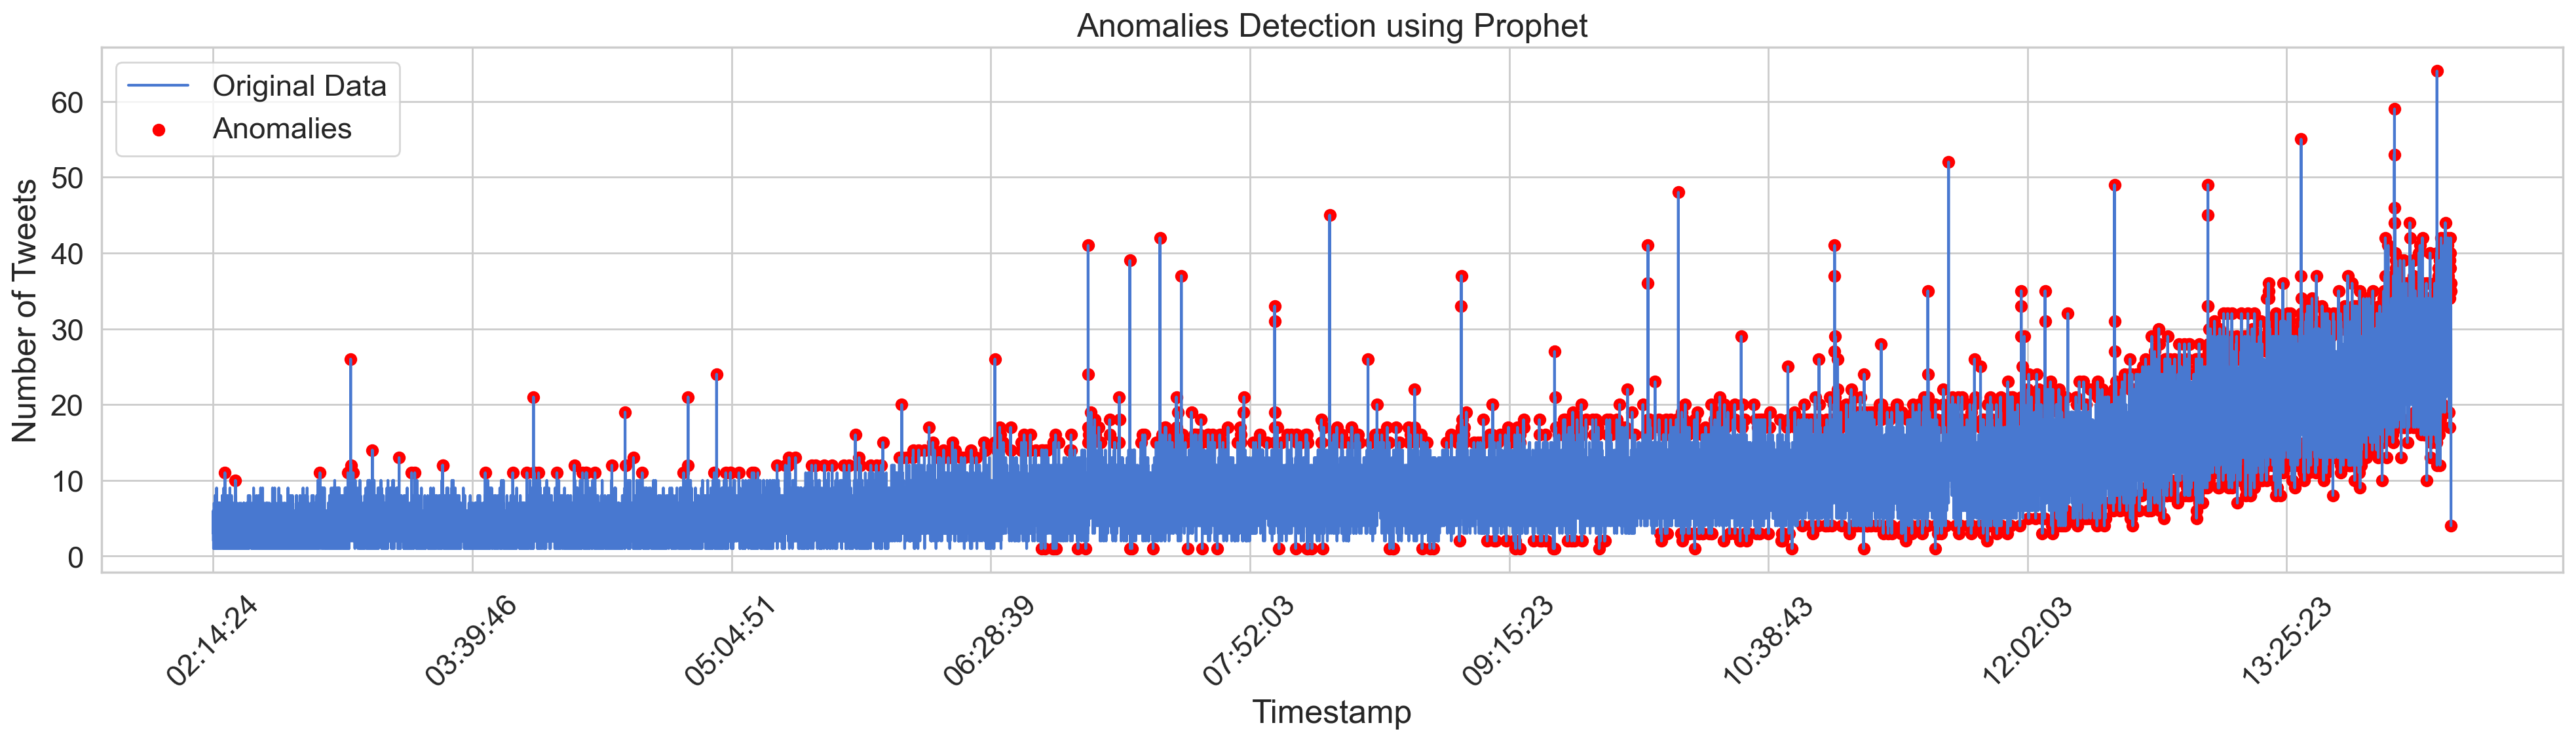

In [21]:
plt.figure(figsize=(20, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Original Data')
plt.scatter(anomalies_prophet['ds'], anomalies_prophet['y'], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('Anomalies Detection using Prophet')
plt.legend()
plt.xticks(rotation=45)
x_ticks_frequency = 5000  # Show a tick every 60 data points 
total_data_points = len(df)
tick_positions = range(0, total_data_points, x_ticks_frequency)
tick_labels = df['timestamp'][tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)  
plt.tight_layout()  
plt.show()


In [36]:

# Prepare data for Prophet
prophet_data = df.rename(columns={'timestamp': 'ds', 'nbr_of_tweets': 'y'})

# Create and fit the Prophet model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_data)

# Make future dataframe for predictions
future = prophet_model.make_future_dataframe(periods=0)
forecast = prophet_model.predict(future)

# Detect anomalies based on prediction residuals
prophet_data['residual'] = np.abs(prophet_data['y'] - forecast['yhat'])
threshold_prophet = np.percentile(prophet_data['residual'], 95)

# Create a new column 'prophet_anomalie' in df indicating anomalies with 1 and non-anomalies with 0
df['prophet_anomalie'] = np.where(prophet_data['residual'] > threshold_prophet, 1, 0)

# Display the updated DataFrame with the new 'prophet_anomalie' column
df


14:46:06 - cmdstanpy - INFO - Chain [1] start processing
14:46:13 - cmdstanpy - INFO - Chain [1] done processing


,timestamp,nbr_of_tweets,dbscan_labels,z_score_anomalie,moving_average_anomalie,isolation_forest_anomalie,lof_anomalie,ocsvm_anomalie,dbscan_anomalie,autoencoder_anomalie,prophet_anomalie
0,02:14:24,3,0,0,0,0,0,0,0,0,0
1,02:14:25,3,0,0,0,0,0,0,0,0,0
2,02:14:26,4,0,0,0,0,0,0,0,0,0
3,02:14:27,6,0,0,0,0,0,0,0,0,0
4,02:14:28,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43165,14:18:08,30,0,1,0,1,0,1,0,1,0
43166,14:18:09,33,0,1,0,1,0,1,0,0,0
43167,14:18:10,30,0,1,0,1,0,1,0,1,0
43168,14:18:11,27,0,1,0,1,0,0,0,0,0


In [37]:
df.describe()

,nbr_of_tweets,dbscan_labels,z_score_anomalie,moving_average_anomalie,isolation_forest_anomalie,lof_anomalie,ocsvm_anomalie,dbscan_anomalie,autoencoder_anomalie,prophet_anomalie
count,43170.000000,43170.000000,43170.000000,43170.000000,43170.000000,43170.000000,43170.000000,43170.000000,43170.000000,43170.000000
mean,9.311999,-0.000046,0.054413,0.024902,0.049479,0.001297,0.117466,0.000046,0.038962,0.050012
std,6.431806,0.006806,0.226833,0.155827,0.216868,0.035994,0.321978,0.006806,0.193507,0.217971
min,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,64.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  43170 non-null  object
 1   nbr_of_tweets              43170 non-null  int64 
 2   dbscan_labels              43170 non-null  int64 
 3   z_score_anomalie           43170 non-null  int32 
 4   moving_average_anomalie    43170 non-null  int64 
 5   isolation_forest_anomalie  43170 non-null  int64 
 6   lof_anomalie               43170 non-null  int64 
 7   ocsvm_anomalie             43170 non-null  int64 
 8   dbscan_anomalie            43170 non-null  int64 
 9   autoencoder_anomalie       43170 non-null  int32 
 10  prophet_anomalie           43170 non-null  int32 
dtypes: int32(3), int64(7), object(1)
memory usage: 3.1+ MB


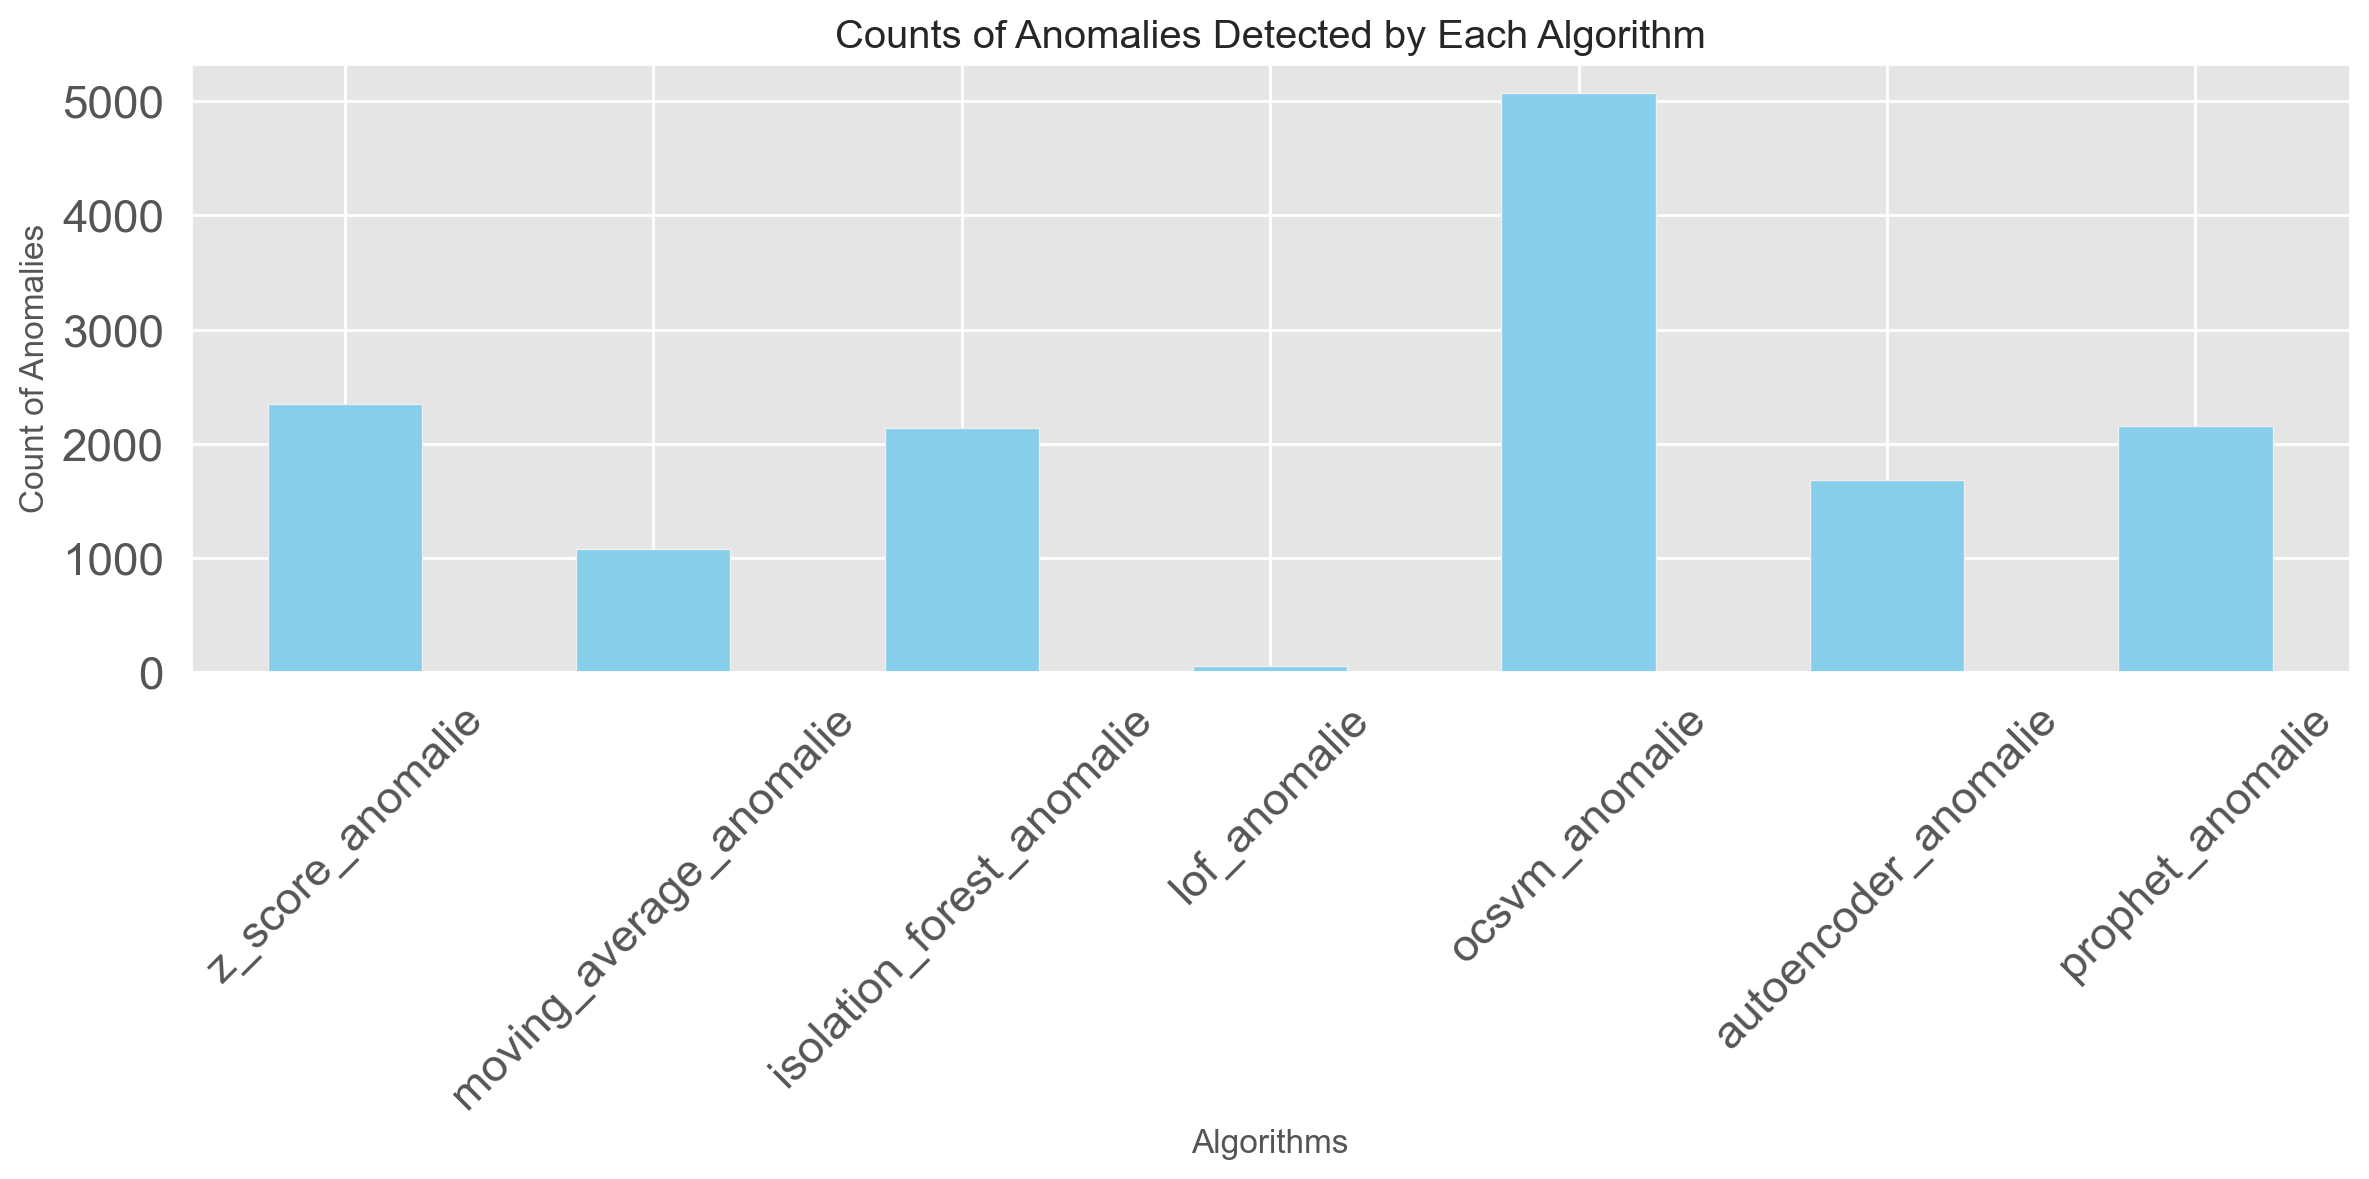

In [46]:

# Set the 'ggplot' style for R-style visualization
plt.style.use('ggplot')


# List of anomaly columns after excluding 'dbscan_labels'
anomaly_columns = [
    'z_score_anomalie', 'moving_average_anomalie', 
    'isolation_forest_anomalie', 'lof_anomalie', 'ocsvm_anomalie',
    'dbscan_anomalie', 'autoencoder_anomalie', 'prophet_anomalie'
]
# Count occurrences of anomalies detected by each algorithm
anomaly_counts = df[anomaly_columns].sum()

# Plotting bar plots for counts of anomalies detected by each algorithm
plt.figure(figsize=(12, 6))
anomaly_counts.drop('dbscan_anomalie').plot(kind='bar', color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Count of Anomalies')
plt.title('Counts of Anomalies Detected by Each Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
df

,timestamp,nbr_of_tweets,z_score_anomalie,moving_average_anomalie,isolation_forest_anomalie,lof_anomalie,ocsvm_anomalie,dbscan_anomalie,autoencoder_anomalie,prophet_anomalie
0,02:14:24,3,0,0,0,0,0,0,0,0
1,02:14:25,3,0,0,0,0,0,0,0,0
2,02:14:26,4,0,0,0,0,0,0,0,0
3,02:14:27,6,0,0,0,0,0,0,0,0
4,02:14:28,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
43165,14:18:08,30,1,0,1,0,1,0,1,0
43166,14:18:09,33,1,0,1,0,1,0,0,0
43167,14:18:10,30,1,0,1,0,1,0,1,0
43168,14:18:11,27,1,0,1,0,0,0,0,0


In [47]:
# Save the DataFrame 'df' to a CSV file
df.to_csv('all_anmalies_detected.csv', index=False)